In [2]:
import os 
import json


# ha
IMG_NAME_LIST = ['ha_367.png', 'ha_84.png', 'ha_207.png', 'ha_2.png', 'ha_212.png', 'ha_399.png', 'ha_428.png', 'ha_172.png', 'ha_50.png', 'ha_1.png', 'ha_407.png', 'ha_201.png', 'ha_215.png', 'ha_5.png', 'ha_348.png', 'ha_54.png', 'ha_412.png', 'ha_174.png', 'ha_404.png', 'ha_202.png', 'ha_43.png', 'ha_377.png', 'ha_149.png', 'ha_106.png', 'ha_24.png', 'ha_476.png', 'ha_310.png', 'ha_489.png', 'ha_477.png', 'ha_311.png', 'ha_19.png', 'ha_107.png', 'ha_139.png', 'ha_111.png', 'ha_33.png', 'ha_27.png', 'ha_475.png', 'ha_32.png', 'ha_110.png', 'ha_128.png', 'ha_262.png', 'ha_288.png', 'ha_303.png', 'ha_301.png', 'ha_315.png', 'ha_329.png', 'ha_249.png', 'ha_314.png', 'ha_466.png', 'ha_116.png', 'ha_11.png', 'ha_443.png', 'ha_292.png', 'ha_244.png', 'ha_442.png', 'ha_132.png', 'ha_130.png', 'ha_124.png', 'ha_454.png', 'ha_497.png', 'ha_252.png', 'ha_284.png', 'ha_482.png', 'ha_131.png', 'ha_119.png', 'ha_451.png', 'ha_243.png', 'ha_257.png', 'ha_256.png', 'ha_16.png', 'ha_450.png', 'ha_122.png', 'ha_320.png', 'ha_334.png', 'ha_491.png', 'ha_268.png', 'ha_296.png', 'ha_241.png', 'ha_233.png', 'ha_384.png', 'ha_186.png', 'ha_151.png', 'ha_145.png', 'ha_184.png', 'ha_59.png', 'ha_9.png', 'ha_393.png', 'ha_344.png', 'ha_422.png', 'ha_185.png', 'ha_152.png', 'ha_368.png', 'ha_235.png', 'ha_221.png', 'ha_382.png', 'ha_396.png', 'ha_341.png', 'ha_380.png', 'ha_381.png', 'ha_342.png']
# fe
IMG_NAME_LIST = ['fe_382.png', 'fe_427.png', 'fe_291.png', 'fe_17.png', 'fe_22.png', 'fe_376.png', 'fe_193.png', 'fe_362.png', 'fe_253.png', 'fe_431.png', 'fe_393.png', 'fe_30.png', 'fe_10.png', 'fe_364.png', 'fe_442.png', 'fe_279.png', 'fe_42.png', 'fe_307.png', 'fe_356.png', 'fe_345.png', 'fe_385.png', 'fe_300.png', 'fe_91.png', 'fe_43.png', 'fe_38.png', 'fe_211.png', 'fe_212.png', 'fe_16.png', 'fe_153.png', 'fe_173.png', 'fe_406.png', 'fe_390.png', 'fe_84.png', 'fe_201.png', 'fe_93.png', 'fe_287.png', 'fe_2.png', 'fe_477.png', 'fe_396.png', 'fe_381.png', 'fe_472.png', 'fe_174.png', 'fe_475.png', 'fe_8.png', 'fe_451.png', 'fe_151.png', 'fe_69.png', 'fe_166.png', 'fe_46.png', 'fe_207.png', 'fe_29.png', 'fe_203.png', 'fe_226.png', 'fe_303.png', 'fe_420.png', 'fe_232.png', 'fe_7.png', 'fe_340.png', 'fe_249.png', 'fe_202.png', 'fe_313.png', 'fe_11.png', 'fe_53.png', 'fe_191.png', 'fe_271.png', 'fe_408.png', 'fe_349.png', 'fe_128.png', 'fe_449.png', 'fe_473.png', 'fe_185.png', 'fe_336.png', 'fe_260.png', 'fe_380.png', 'fe_197.png', 'fe_206.png', 'fe_125.png', 'fe_181.png', 'fe_441.png', 'fe_238.png', 'fe_110.png', 'fe_150.png', 'fe_184.png', 'fe_34.png', 'fe_204.png', 'fe_147.png', 'fe_95.png', 'fe_39.png', 'fe_236.png', 'fe_1.png', 'fe_237.png', 'fe_159.png', 'fe_26.png', 'fe_499.png', 'fe_143.png', 'fe_402.png', 'fe_57.png', 'fe_90.png', 'fe_417.png', 'fe_59.png', 'fe_5.png', 'fe_484.png']



# files
base_path = './data/fear/'
filenames = os.listdir(base_path)
filenames.sort()

In [3]:
popflag = False
for i in range(len(filenames)):
    if '.DS_Store' not in filenames[i]:
        filenames[i] = os.path.join(base_path, filenames[i])
    else:
        popflag = True
if popflag:
    filenames.pop(0)

In [4]:
filenames

['./data/fear/1_dongagent_fear.txt',
 './data/fear/2_imamura_fear.txt',
 './data/fear/3_tanaka_fear.txt',
 './data/fear/4_hirano_fear.txt',
 './data/fear/5_sun_fear.txt']

In [5]:
# utils
# run this first
def read_json_file(filePath):
    with open(filePath) as f:
        data = json.load(f)
    return data

def read_folder_of_data(exp, folderPath):
    fileNames = sorted(os.listdir(folderPath))
    results = []
    for i in fileNames:
        temp = os.path.join(folderPath, i)
        tempdata = read_json_file(temp)
        
        cleanedList = generateCleanList(exp, tempdata)
        temp_res = mergeFromPairwiseRating(cleanedList)
        temp_res.reverse()
        
        results.append([temp, temp_res])
    return results
        

def getImg(exp, img):
    if exp == 'happy':
        return img[0:] # happiness_selected_imgonly100/ha_106
    elif exp=='fear':
        return img[21:]

def generateCleanList(exp, temp_json):
    cleanedList = temp_json["payload"]['sortedlist']
#     print(cleanedList)
    for i, _ in enumerate(cleanedList):
        cleanedList[i] = getImg(exp, cleanedList[i])
    
    # old method
#     for i in temp_json["payload"]['pairwise_rating']:
#         tempimg1 = getImg(exp, i[0])
#         tempimg2 = getImg(exp, i[1])
#         cleanedList.append([tempimg1, tempimg2, i[2]])
    return cleanedList


# Analysis

In [6]:
exp = 'fear'
# [[#ID 1, #res[]]]
result = []
counter = 1
for i in filenames:
    print(i)
    temp = read_json_file(i)
#     print(temp)
    temp_cleanedList = generateCleanList(exp, temp)
    # print(temp_merged_result)
    result.append([counter, temp_cleanedList])
    counter += 1
    

./data/fear/1_dongagent_fear.txt
./data/fear/2_imamura_fear.txt
./data/fear/3_tanaka_fear.txt
./data/fear/4_hirano_fear.txt
./data/fear/5_sun_fear.txt


## 'ground truth' pyfeat rank order

In [7]:
# get 'ground truth' pyfeat rank order
with open("data/raw_data/fear_raw.json", 'r') as f:
    fear_raw = json.load(f)
# print(fear_raw)

fear_raw_name_only = [x[0] for x in fear_raw]
# print(fear_raw_name_only) # high to low # descending

temp = filter(lambda x: x in result[0][1], fear_raw_name_only)
fear_name_rank_order_pyfeat = list(enumerate(list(temp)))
fear_name_rank_order_pyfeat = {x[1]:x[0] for x in fear_name_rank_order_pyfeat}

print(fear_name_rank_order_pyfeat)

{'fe_313.png': 0, 'fe_499.png': 1, 'fe_191.png': 2, 'fe_197.png': 3, 'fe_472.png': 4, 'fe_336.png': 5, 'fe_84.png': 6, 'fe_53.png': 7, 'fe_30.png': 8, 'fe_356.png': 9, 'fe_382.png': 10, 'fe_147.png': 11, 'fe_57.png': 12, 'fe_427.png': 13, 'fe_202.png': 14, 'fe_150.png': 15, 'fe_475.png': 16, 'fe_396.png': 17, 'fe_29.png': 18, 'fe_174.png': 19, 'fe_380.png': 20, 'fe_59.png': 21, 'fe_390.png': 22, 'fe_125.png': 23, 'fe_110.png': 24, 'fe_16.png': 25, 'fe_232.png': 26, 'fe_212.png': 27, 'fe_477.png': 28, 'fe_91.png': 29, 'fe_173.png': 30, 'fe_7.png': 31, 'fe_408.png': 32, 'fe_5.png': 33, 'fe_10.png': 34, 'fe_17.png': 35, 'fe_484.png': 36, 'fe_385.png': 37, 'fe_95.png': 38, 'fe_287.png': 39, 'fe_181.png': 40, 'fe_185.png': 41, 'fe_303.png': 42, 'fe_441.png': 43, 'fe_402.png': 44, 'fe_406.png': 45, 'fe_93.png': 46, 'fe_211.png': 47, 'fe_1.png': 48, 'fe_349.png': 49, 'fe_46.png': 50, 'fe_431.png': 51, 'fe_38.png': 52, 'fe_166.png': 53, 'fe_362.png': 54, 'fe_449.png': 55, 'fe_249.png': 56, 'fe

## subject 1 Jason

In [23]:
# test for result 0
# jason
j_data = list(enumerate(result[0][1]))
# print(j_data)

In [24]:
# compute rank 
temp_list = []
for i, c in enumerate(j_data):
    temp_list.append((c, fear_name_rank_order_pyfeat[c[1]]))
temp_list.sort(key=lambda x:x[1])
# temp_list = [x[0] for x in temp_list]
print(temp_list)

[((0, 'fe_313.png'), 0), ((18, 'fe_499.png'), 1), ((84, 'fe_191.png'), 2), ((35, 'fe_197.png'), 3), ((10, 'fe_472.png'), 4), ((94, 'fe_336.png'), 5), ((62, 'fe_84.png'), 6), ((4, 'fe_53.png'), 7), ((25, 'fe_30.png'), 8), ((3, 'fe_356.png'), 9), ((27, 'fe_382.png'), 10), ((17, 'fe_147.png'), 11), ((100, 'fe_57.png'), 12), ((12, 'fe_427.png'), 13), ((16, 'fe_202.png'), 14), ((23, 'fe_150.png'), 15), ((20, 'fe_475.png'), 16), ((5, 'fe_396.png'), 17), ((13, 'fe_29.png'), 18), ((11, 'fe_174.png'), 19), ((24, 'fe_380.png'), 20), ((9, 'fe_59.png'), 21), ((43, 'fe_390.png'), 22), ((40, 'fe_125.png'), 23), ((30, 'fe_110.png'), 24), ((15, 'fe_16.png'), 25), ((19, 'fe_232.png'), 26), ((75, 'fe_212.png'), 27), ((42, 'fe_477.png'), 28), ((6, 'fe_91.png'), 29), ((44, 'fe_173.png'), 30), ((55, 'fe_7.png'), 31), ((49, 'fe_408.png'), 32), ((14, 'fe_5.png'), 33), ((52, 'fe_10.png'), 34), ((29, 'fe_17.png'), 35), ((26, 'fe_484.png'), 36), ((7, 'fe_385.png'), 37), ((63, 'fe_95.png'), 38), ((34, 'fe_287.pn

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 18, 84, 35, 10, 94, 62, 4, 25, 3, 27, 17, 100, 12, 16, 23, 20, 5, 13, 11, 24, 9, 43, 40, 30, 15, 19, 75, 42, 6, 44, 55, 49, 14, 52, 29, 26, 7, 63, 34, 2, 21, 85, 41, 81, 45, 8, 54, 56, 51, 64, 32, 93, 83, 31, 38, 46, 48, 90, 74, 79, 87, 66, 70, 33, 71, 76, 92, 80, 77, 57, 73, 95, 53, 37, 1, 58, 89, 60, 22, 69, 39, 50, 78, 47, 98, 28, 36, 82, 65, 72, 61, 67, 86, 97, 99, 101, 59, 96, 91, 68, 88]


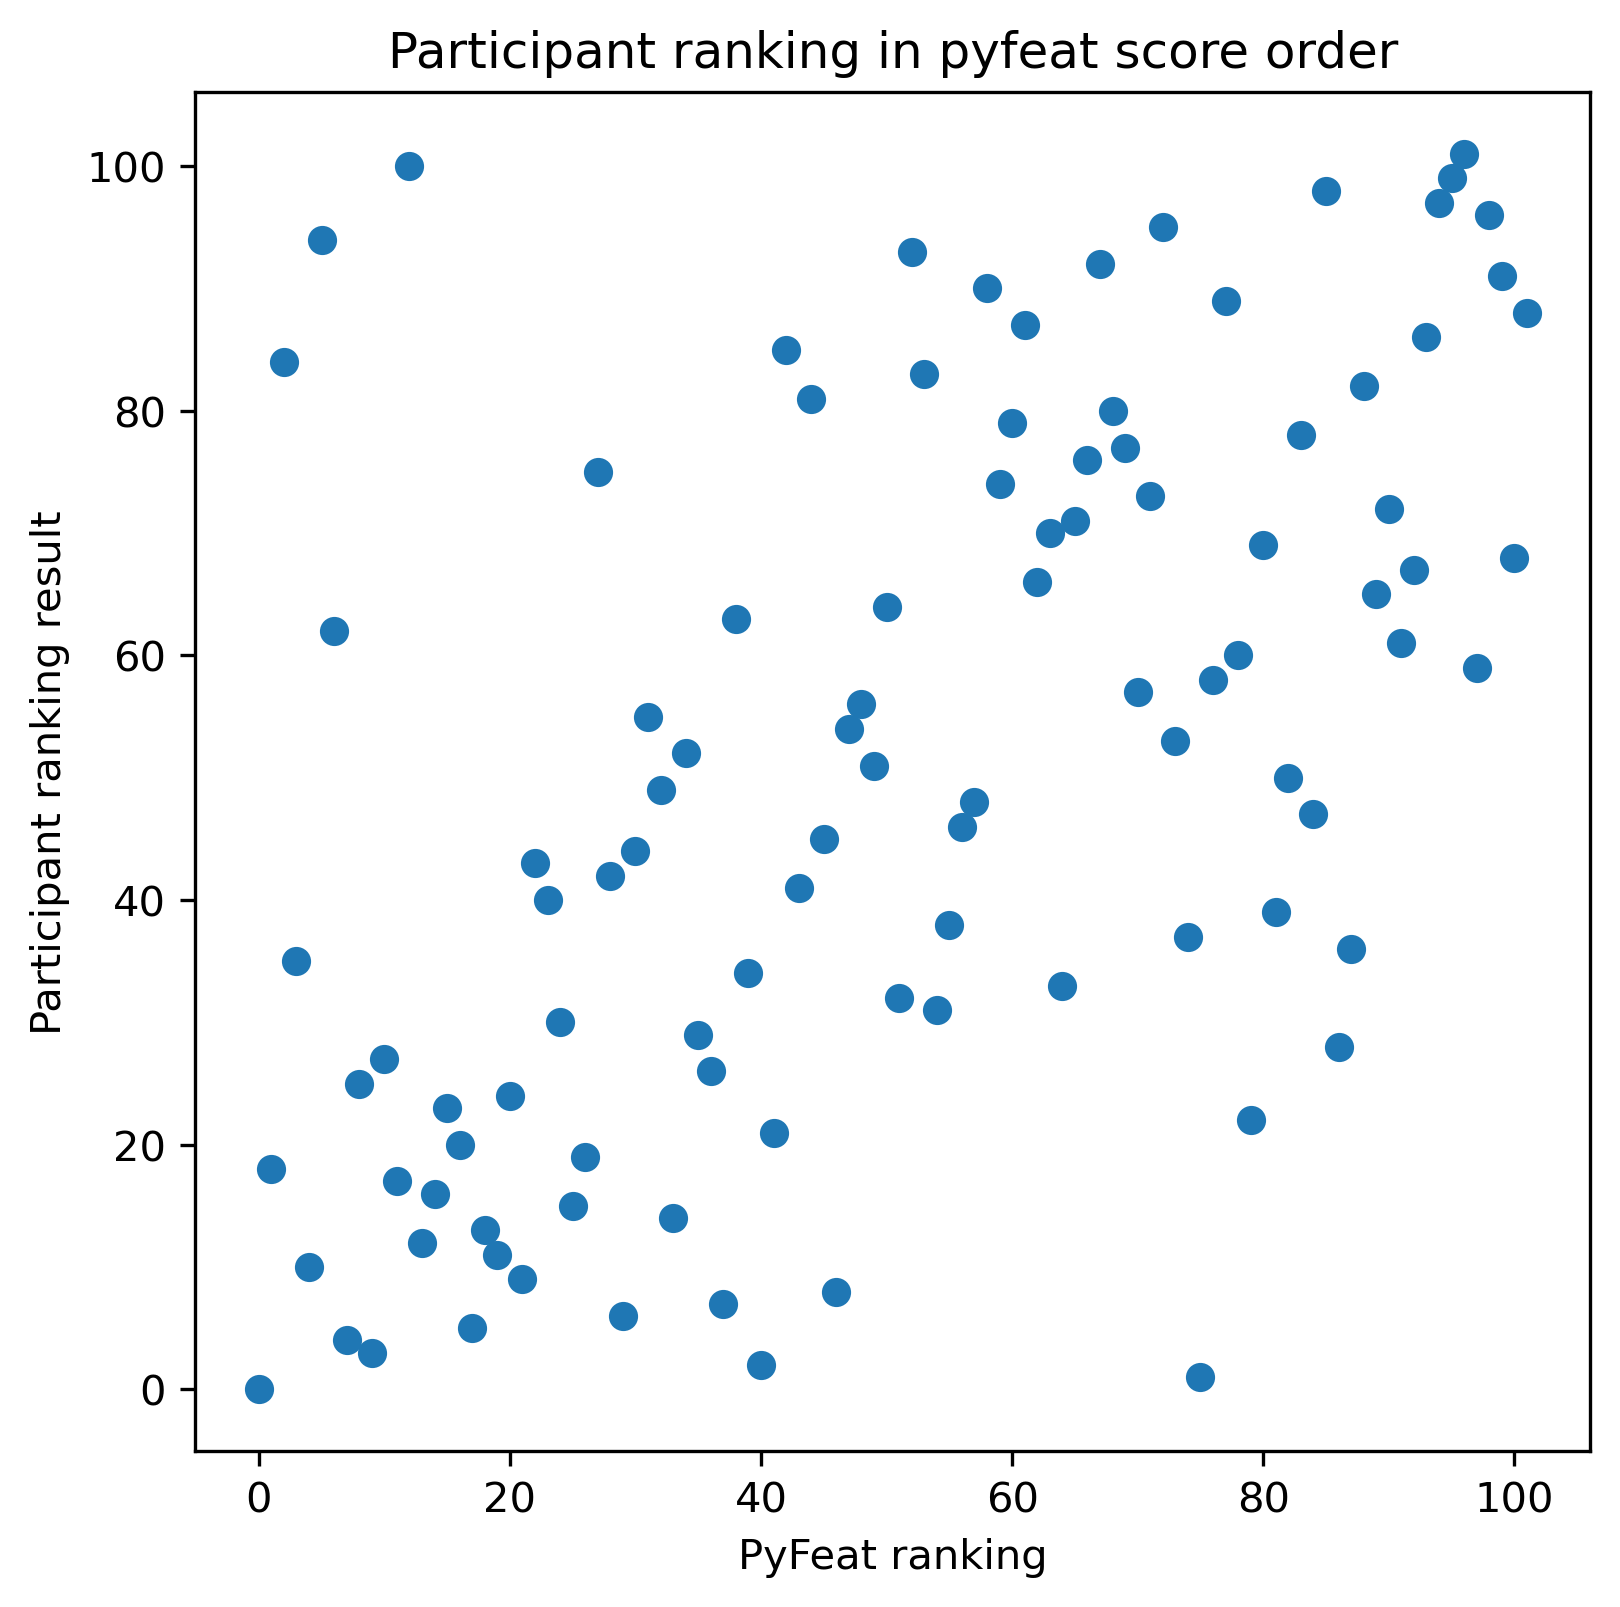

In [25]:
# scatter graph
import numpy as np
import matplotlib.pyplot as plt

x = [i[1] for i in temp_list]
y1 = [i[0][0] for i in temp_list]
print(x)
print(y1)
f,ax = plt.subplots(figsize=(6, 6), dpi=300)
ax.set_title('Participant ranking in pyfeat score order') # title
ax.set_xlabel('PyFeat ranking') # x-axis
ax.set_ylabel('Participant ranking result') # y-axis
plt.scatter(x, y1)
plt.show()


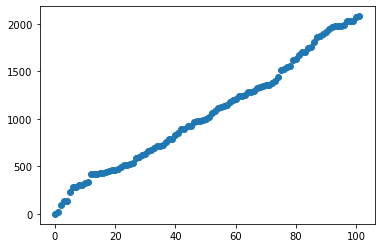

In [26]:
x = [i for i in range(102)]
y = []
temp_score = 0
for i in temp_list:
    tmp = abs(i[1] - i[0][0])
    temp_score += tmp
    y.append(temp_score)

plt.scatter(x, y)
plt.show()

## subject 2

In [27]:
# imamura
i_data = list(enumerate(result[1][1]))
print(i_data)

[(0, 'fe_396.png'), (1, 'fe_17.png'), (2, 'fe_382.png'), (3, 'fe_93.png'), (4, 'fe_427.png'), (5, 'fe_232.png'), (6, 'fe_53.png'), (7, 'fe_5.png'), (8, 'fe_110.png'), (9, 'fe_29.png'), (10, 'fe_431.png'), (11, 'fe_166.png'), (12, 'fe_472.png'), (13, 'fe_313.png'), (14, 'fe_499.png'), (15, 'fe_147.png'), (16, 'fe_150.png'), (17, 'fe_1.png'), (18, 'fe_206.png'), (19, 'fe_91.png'), (20, 'fe_128.png'), (21, 'fe_484.png'), (22, 'fe_57.png'), (23, 'fe_385.png'), (24, 'fe_173.png'), (25, 'fe_84.png'), (26, 'fe_356.png'), (27, 'fe_202.png'), (28, 'fe_174.png'), (29, 'fe_59.png'), (30, 'fe_151.png'), (31, 'fe_475.png'), (32, 'fe_90.png'), (33, 'fe_253.png'), (34, 'fe_197.png'), (35, 'fe_181.png'), (36, 'fe_16.png'), (37, 'fe_287.png'), (38, 'fe_10.png'), (39, 'fe_362.png'), (40, 'fe_279.png'), (41, 'fe_39.png'), (42, 'fe_207.png'), (43, 'fe_336.png'), (44, 'fe_303.png'), (45, 'fe_43.png'), (46, 'fe_406.png'), (47, 'fe_390.png'), (48, 'fe_30.png'), (49, 'fe_441.png'), (50, 'fe_211.png'), (51, 'f

In [28]:
# compute rank 
temp_list = []
for i, c in enumerate(i_data):
    temp_list.append((c, fear_name_rank_order_pyfeat[c[1]]))
temp_list.sort(key=lambda x:x[1])
# temp_list = [x[0] for x in temp_list]
print(temp_list)

[((13, 'fe_313.png'), 0), ((14, 'fe_499.png'), 1), ((59, 'fe_191.png'), 2), ((34, 'fe_197.png'), 3), ((12, 'fe_472.png'), 4), ((43, 'fe_336.png'), 5), ((25, 'fe_84.png'), 6), ((6, 'fe_53.png'), 7), ((48, 'fe_30.png'), 8), ((26, 'fe_356.png'), 9), ((2, 'fe_382.png'), 10), ((15, 'fe_147.png'), 11), ((22, 'fe_57.png'), 12), ((4, 'fe_427.png'), 13), ((27, 'fe_202.png'), 14), ((16, 'fe_150.png'), 15), ((31, 'fe_475.png'), 16), ((0, 'fe_396.png'), 17), ((9, 'fe_29.png'), 18), ((28, 'fe_174.png'), 19), ((77, 'fe_380.png'), 20), ((29, 'fe_59.png'), 21), ((47, 'fe_390.png'), 22), ((68, 'fe_125.png'), 23), ((8, 'fe_110.png'), 24), ((36, 'fe_16.png'), 25), ((5, 'fe_232.png'), 26), ((96, 'fe_212.png'), 27), ((74, 'fe_477.png'), 28), ((19, 'fe_91.png'), 29), ((24, 'fe_173.png'), 30), ((53, 'fe_7.png'), 31), ((69, 'fe_408.png'), 32), ((7, 'fe_5.png'), 33), ((38, 'fe_10.png'), 34), ((1, 'fe_17.png'), 35), ((21, 'fe_484.png'), 36), ((23, 'fe_385.png'), 37), ((82, 'fe_95.png'), 38), ((37, 'fe_287.png')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[13, 14, 59, 34, 12, 43, 25, 6, 48, 26, 2, 15, 22, 4, 27, 16, 31, 0, 9, 28, 77, 29, 47, 68, 8, 36, 5, 96, 74, 19, 24, 53, 69, 7, 38, 1, 21, 23, 82, 37, 35, 61, 44, 49, 79, 46, 3, 50, 17, 97, 89, 10, 58, 11, 39, 75, 65, 32, 42, 62, 33, 67, 76, 87, 70, 91, 63, 40, 51, 93, 60, 85, 88, 52, 66, 57, 20, 72, 30, 45, 56, 55, 101, 90, 83, 94, 41, 54, 18, 80, 100, 73, 98, 86, 81, 84, 71, 64, 99, 95, 78, 92]


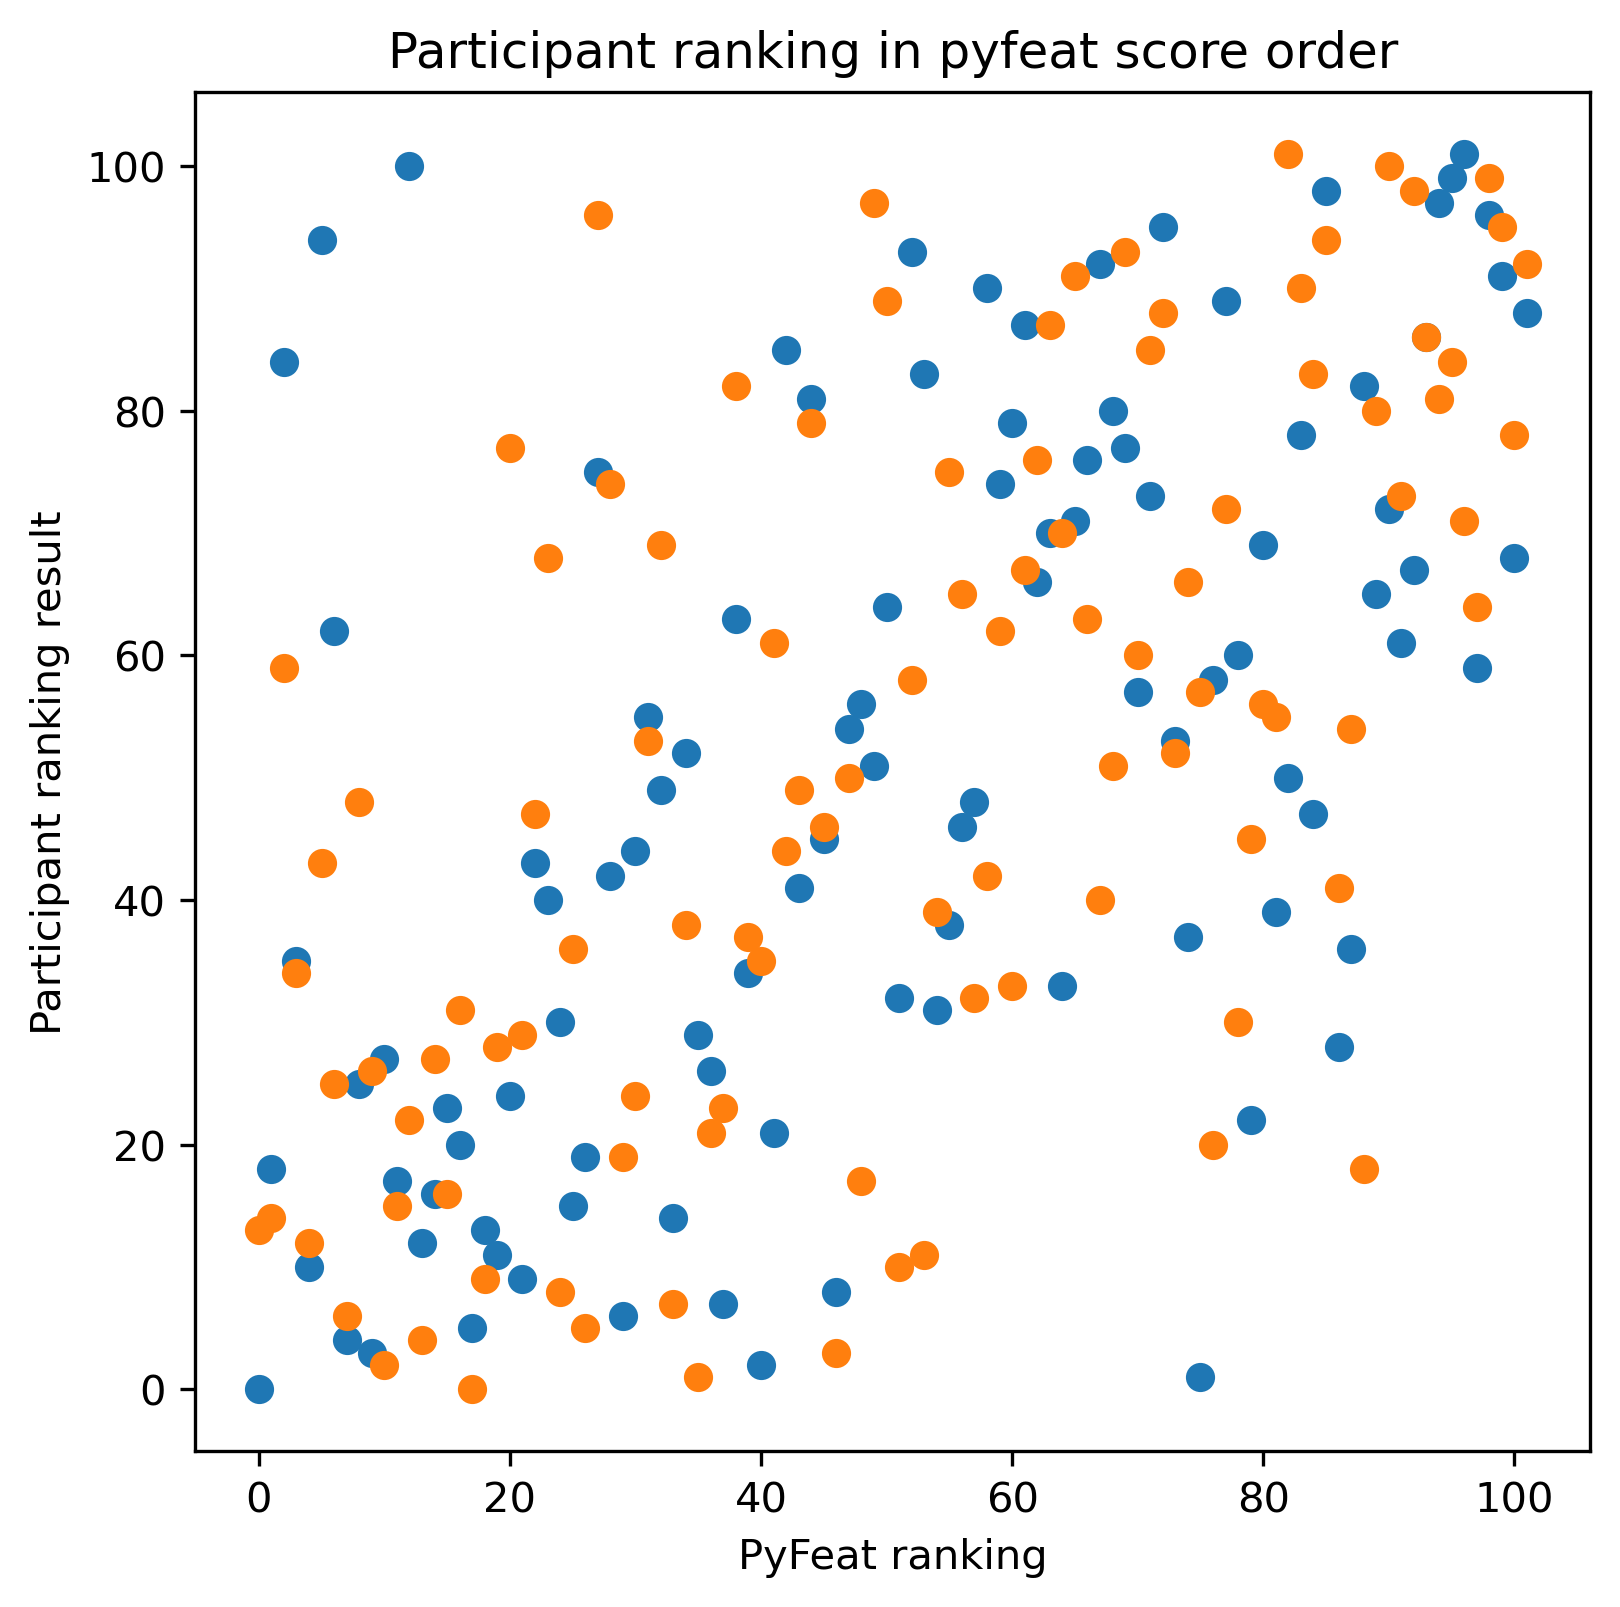

In [29]:
# scatter graph
import numpy as np
import matplotlib.pyplot as plt

x = [i[1] for i in temp_list]
y2 = [i[0][0] for i in temp_list]
print(x)
print(y2)
f,ax = plt.subplots(figsize=(6, 6), dpi=300)
ax.set_title('Participant ranking in pyfeat score order') # title
ax.set_xlabel('PyFeat ranking') # x-axis
ax.set_ylabel('Participant ranking result') # y-axis
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.show()


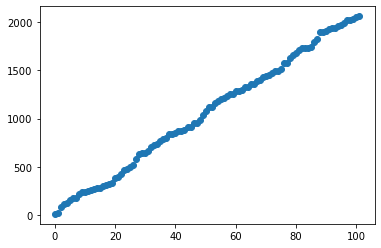

In [22]:
x = [i for i in range(102)]
y = []
temp_score = 0
for i in temp_list:
    tmp = abs(i[1] - i[0][0])
    temp_score += tmp
    y.append(temp_score)

plt.scatter(x, y)
plt.show()

# Participant analysis
# 5 subject graph

## ranking average

In [45]:
print(aver_ranking)

[('fe_313.png', 0), ('fe_499.png', 0), ('fe_191.png', 0), ('fe_197.png', 0), ('fe_472.png', 0), ('fe_336.png', 0), ('fe_84.png', 0), ('fe_53.png', 0), ('fe_30.png', 0), ('fe_356.png', 0), ('fe_382.png', 0), ('fe_147.png', 0), ('fe_57.png', 0), ('fe_427.png', 0), ('fe_202.png', 0), ('fe_150.png', 0), ('fe_475.png', 0), ('fe_396.png', 0), ('fe_29.png', 0), ('fe_174.png', 0), ('fe_380.png', 0), ('fe_59.png', 0), ('fe_390.png', 0), ('fe_125.png', 0), ('fe_110.png', 0), ('fe_16.png', 0), ('fe_232.png', 0), ('fe_212.png', 0), ('fe_477.png', 0), ('fe_91.png', 0), ('fe_173.png', 0), ('fe_7.png', 0), ('fe_408.png', 0), ('fe_5.png', 0), ('fe_10.png', 0), ('fe_17.png', 0), ('fe_484.png', 0), ('fe_385.png', 0), ('fe_95.png', 0), ('fe_287.png', 0), ('fe_181.png', 0), ('fe_185.png', 0), ('fe_303.png', 0), ('fe_441.png', 0), ('fe_402.png', 0), ('fe_406.png', 0), ('fe_93.png', 0), ('fe_211.png', 0), ('fe_1.png', 0), ('fe_349.png', 0), ('fe_46.png', 0), ('fe_431.png', 0), ('fe_38.png', 0), ('fe_166.png

In [57]:
aver_ranking = list(fear_name_rank_order_pyfeat.items())
for i, c in enumerate(aver_ranking):
    aver_ranking[i] = [c[0], 0]

for i in range(len(result)):
    temp_data = list(enumerate(result[i][1]))
    temp_list = []
    for i, c in enumerate(temp_data):
        temp_list.append((c, fear_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])
    # print(temp_list)
    for i, c in enumerate(aver_ranking):
        if c[0] == temp_list[i][0][1]:
            aver_ranking[i][1] += temp_list[i][0][0]

In [69]:
aver_ranking_new = list(enumerate(aver_ranking))
aver_ranking_new.sort(key=lambda x:x[1][1], reverse=False)
print(aver_ranking_new)
# 'fe_307.png'
# 'fe_26.png'
POPLIST = ['fe_307.png', 'fe_26.png']

[(21, ['fe_59.png', 44]), (29, ['fe_91.png', 49]), (46, ['fe_93.png', 51]), (0, ['fe_313.png', 54]), (13, ['fe_427.png', 54]), (9, ['fe_356.png', 55]), (4, ['fe_472.png', 71]), (25, ['fe_16.png', 71]), (37, ['fe_385.png', 77]), (35, ['fe_17.png', 82]), (17, ['fe_396.png', 86]), (14, ['fe_202.png', 92]), (18, ['fe_29.png', 95]), (36, ['fe_484.png', 95]), (16, ['fe_475.png', 107]), (10, ['fe_382.png', 108]), (22, ['fe_390.png', 112]), (24, ['fe_110.png', 118]), (19, ['fe_174.png', 121]), (33, ['fe_5.png', 121]), (45, ['fe_406.png', 124]), (26, ['fe_232.png', 126]), (15, ['fe_150.png', 128]), (30, ['fe_173.png', 129]), (1, ['fe_499.png', 136]), (7, ['fe_53.png', 137]), (8, ['fe_30.png', 140]), (40, ['fe_181.png', 147]), (51, ['fe_431.png', 158]), (43, ['fe_441.png', 162]), (3, ['fe_197.png', 164]), (23, ['fe_125.png', 168]), (6, ['fe_84.png', 173]), (5, ['fe_336.png', 174]), (41, ['fe_185.png', 190]), (12, ['fe_57.png', 205]), (34, ['fe_10.png', 205]), (39, ['fe_287.png', 207]), (20, ['fe

In [75]:
# clean data
cleaned_result = []
for i, c in enumerate(result):
    temp_c = c[1]
    # print(temp_c)
    temp_c_cleanned = []
    for d in temp_c:
        if d not in POPLIST:
            temp_c_cleanned.append(d)
    cleaned_result.append([i+1, temp_c_cleanned])

5
100


In [81]:
# update cleanned
# with open("data/raw_data/fear_raw.json", 'r') as f:
#     fear_raw = json.load(f)
# # print(fear_raw)

# fear_raw_name_only = [x[0] for x in fear_raw]
# # print(fear_raw_name_only) # high to low # descending
temp = filter(lambda x: x in cleaned_result[0][1], fear_raw_name_only)
fear_name_rank_order_pyfeat = list(enumerate(list(temp)))
fear_name_rank_order_pyfeat = {x[1]:x[0] for x in fear_name_rank_order_pyfeat}

print(fear_name_rank_order_pyfeat)

{'fe_313.png': 0, 'fe_499.png': 1, 'fe_191.png': 2, 'fe_197.png': 3, 'fe_472.png': 4, 'fe_336.png': 5, 'fe_84.png': 6, 'fe_53.png': 7, 'fe_30.png': 8, 'fe_356.png': 9, 'fe_382.png': 10, 'fe_147.png': 11, 'fe_57.png': 12, 'fe_427.png': 13, 'fe_202.png': 14, 'fe_150.png': 15, 'fe_475.png': 16, 'fe_396.png': 17, 'fe_29.png': 18, 'fe_174.png': 19, 'fe_380.png': 20, 'fe_59.png': 21, 'fe_390.png': 22, 'fe_125.png': 23, 'fe_110.png': 24, 'fe_16.png': 25, 'fe_232.png': 26, 'fe_212.png': 27, 'fe_477.png': 28, 'fe_91.png': 29, 'fe_173.png': 30, 'fe_7.png': 31, 'fe_408.png': 32, 'fe_5.png': 33, 'fe_10.png': 34, 'fe_17.png': 35, 'fe_484.png': 36, 'fe_385.png': 37, 'fe_95.png': 38, 'fe_287.png': 39, 'fe_181.png': 40, 'fe_185.png': 41, 'fe_303.png': 42, 'fe_441.png': 43, 'fe_402.png': 44, 'fe_406.png': 45, 'fe_93.png': 46, 'fe_211.png': 47, 'fe_1.png': 48, 'fe_349.png': 49, 'fe_46.png': 50, 'fe_431.png': 51, 'fe_38.png': 52, 'fe_166.png': 53, 'fe_362.png': 54, 'fe_449.png': 55, 'fe_249.png': 56, 'fe

## scatter graph

/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

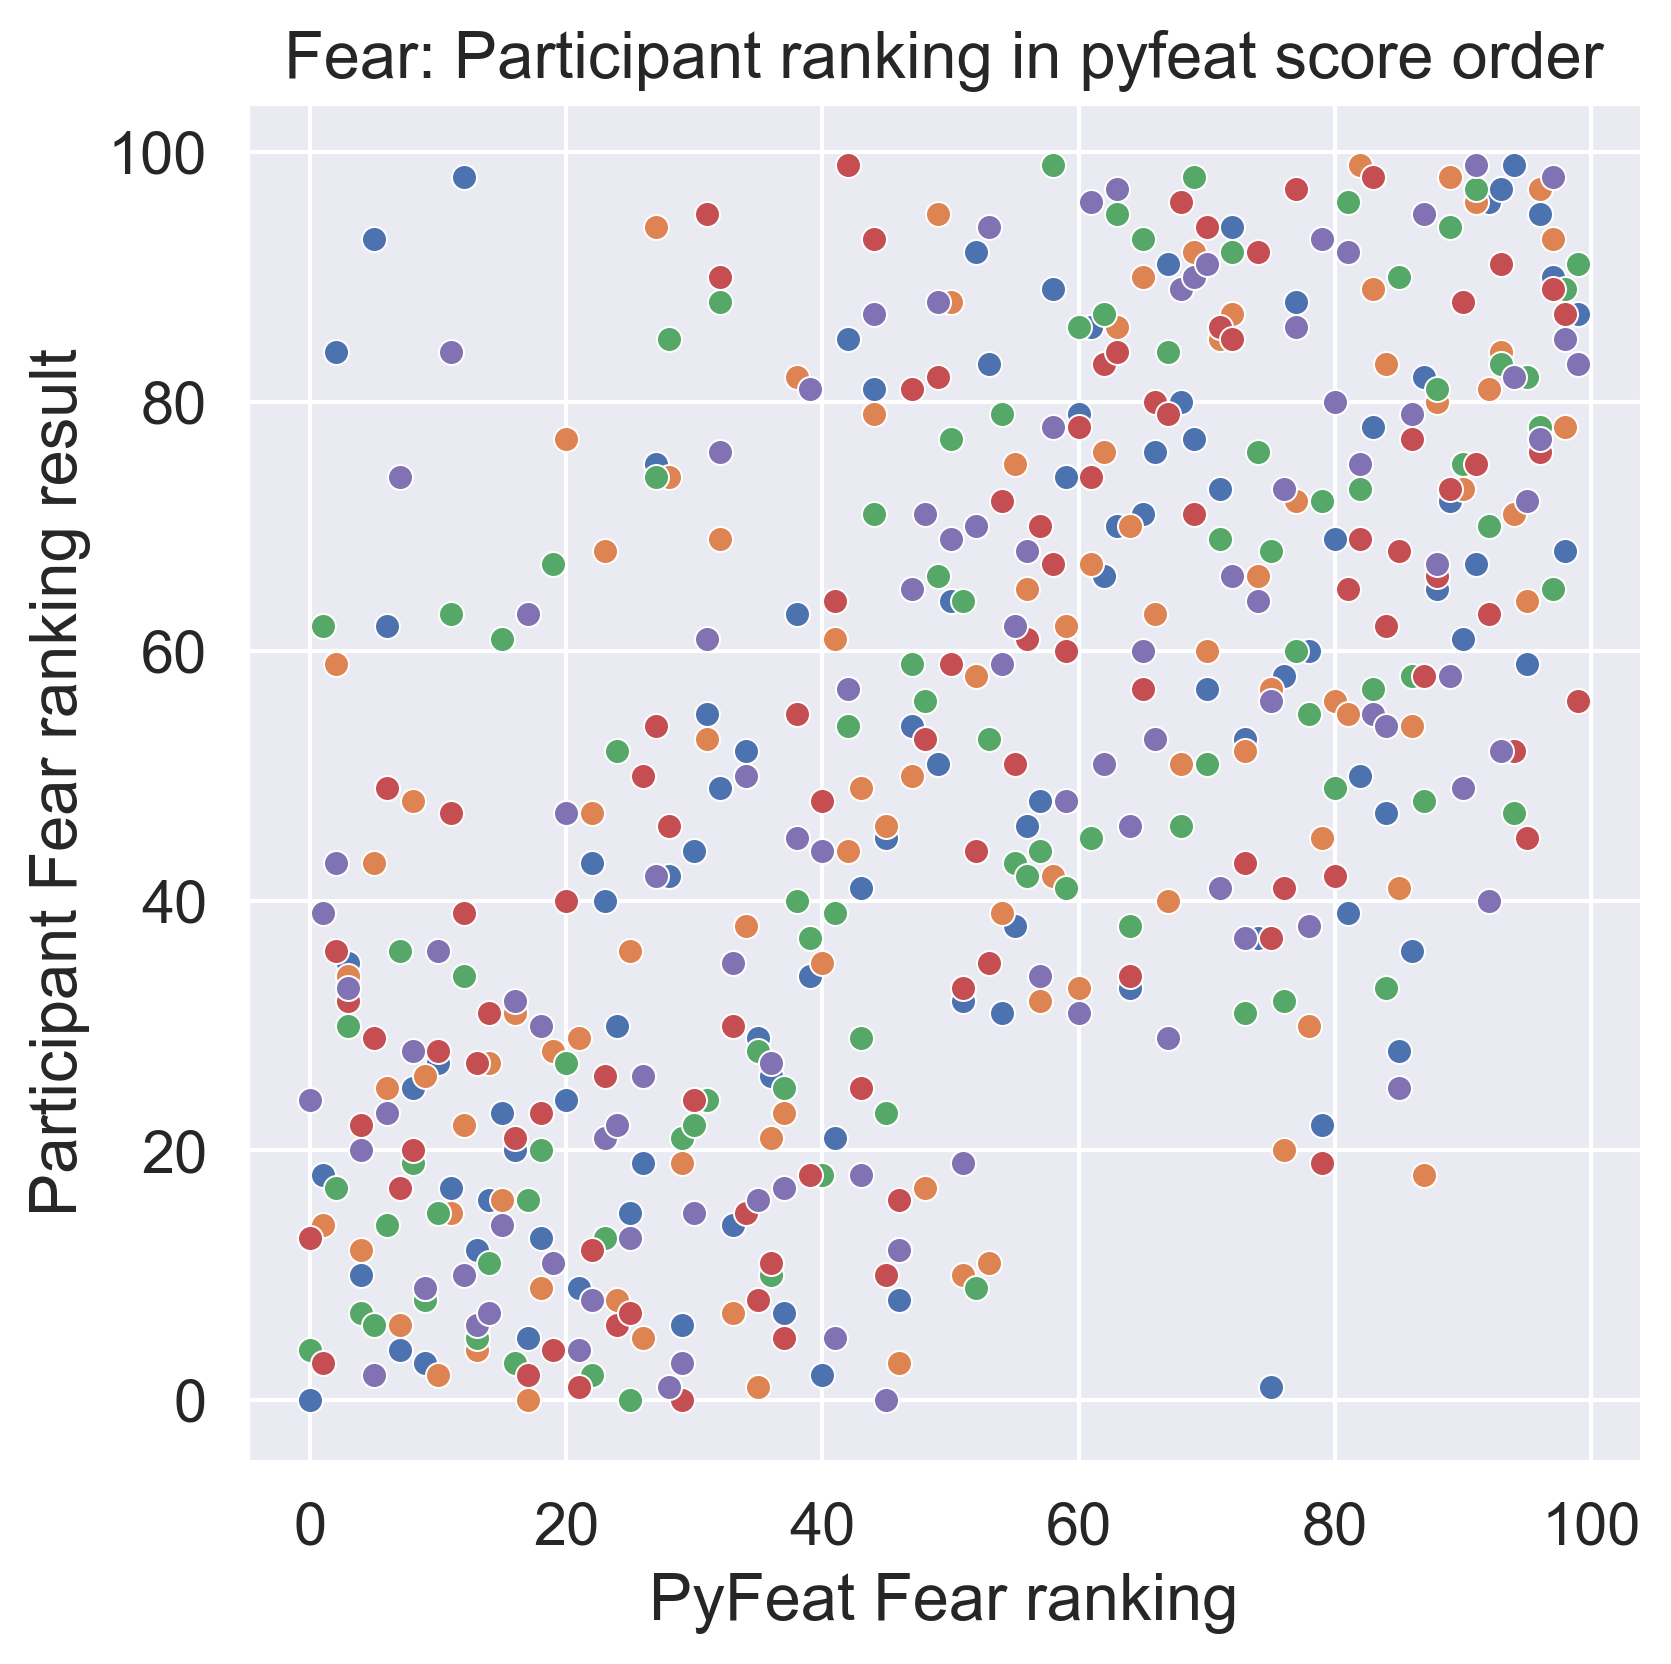

In [220]:
# scatter graph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(6, 6), dpi=300)
myexp = 'Fear'
ax.set_title('{}: Participant ranking in pyfeat score order'.format(myexp)) # title
ax.set_xlabel('PyFeat {} ranking'.format(myexp)) # x-axis
ax.set_ylabel('Participant {} ranking result'.format(myexp)) # y-axis

values = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    # print(j_data)
    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_data):
        temp_list.append((c, fear_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])
    # temp_list = [x[0] for x in temp_list]
    
    x = [k[1] for k in temp_list]
    y = [m[0][0] for m in temp_list]
    
    # scatter plot
    sns.scatterplot(x, y)
    
    # line chart
    # sns.lineplot(x, y)
    # sns.lineplot(x='num', y='sqr', data=pdnumsqr)


    # break
    plt.savefig('fear_subject{}.png'.format(str(i + 1)), bbox_inches='tight', pad_inches=0, dpi=300)
    
# plot_y = pd.DataFrame(values)

# print(plot_y)
# sns.scatterplot(plot_y)
# plt.savefig('figname.png', facecolor=f.get_facecolor(), transparent=False)
# plt.savefig('test1.png', dpi=300)
# plt.savefig('test1.png', bbox_inches='tight', pad_inches=0, dpi=300)

## Linear regression analysis

LinregressResult(slope=0.541902190219022, intercept=22.675841584158412, rvalue=0.541902190219022, pvalue=5.79618378573314e-09, stderr=0.08489741806582302, intercept_stderr=4.864777623869083)
LinregressResult(slope=0.6054365436543655, intercept=19.53089108910891, rvalue=0.6054365436543655, pvalue=2.5103193898572145e-11, stderr=0.08039739256152778, intercept_stderr=4.606917916484784)
LinregressResult(slope=0.6498409840984098, intercept=17.33287128712871, rvalue=0.6498409840984098, pvalue=2.572290991437342e-13, stderr=0.07677868375694574, intercept_stderr=4.399559270946473)
LinregressResult(slope=0.6271707170717072, intercept=18.45504950495049, rvalue=0.6271707170717072, pvalue=2.9213551455318462e-12, stderr=0.07867894537540086, intercept_stderr=4.508447743783072)
LinregressResult(slope=0.5937953795379538, intercept=20.107128712871287, rvalue=0.5937953795379538, pvalue=7.44100454545145e-11, stderr=0.08127849875327105, intercept_stderr=4.657406915838354)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

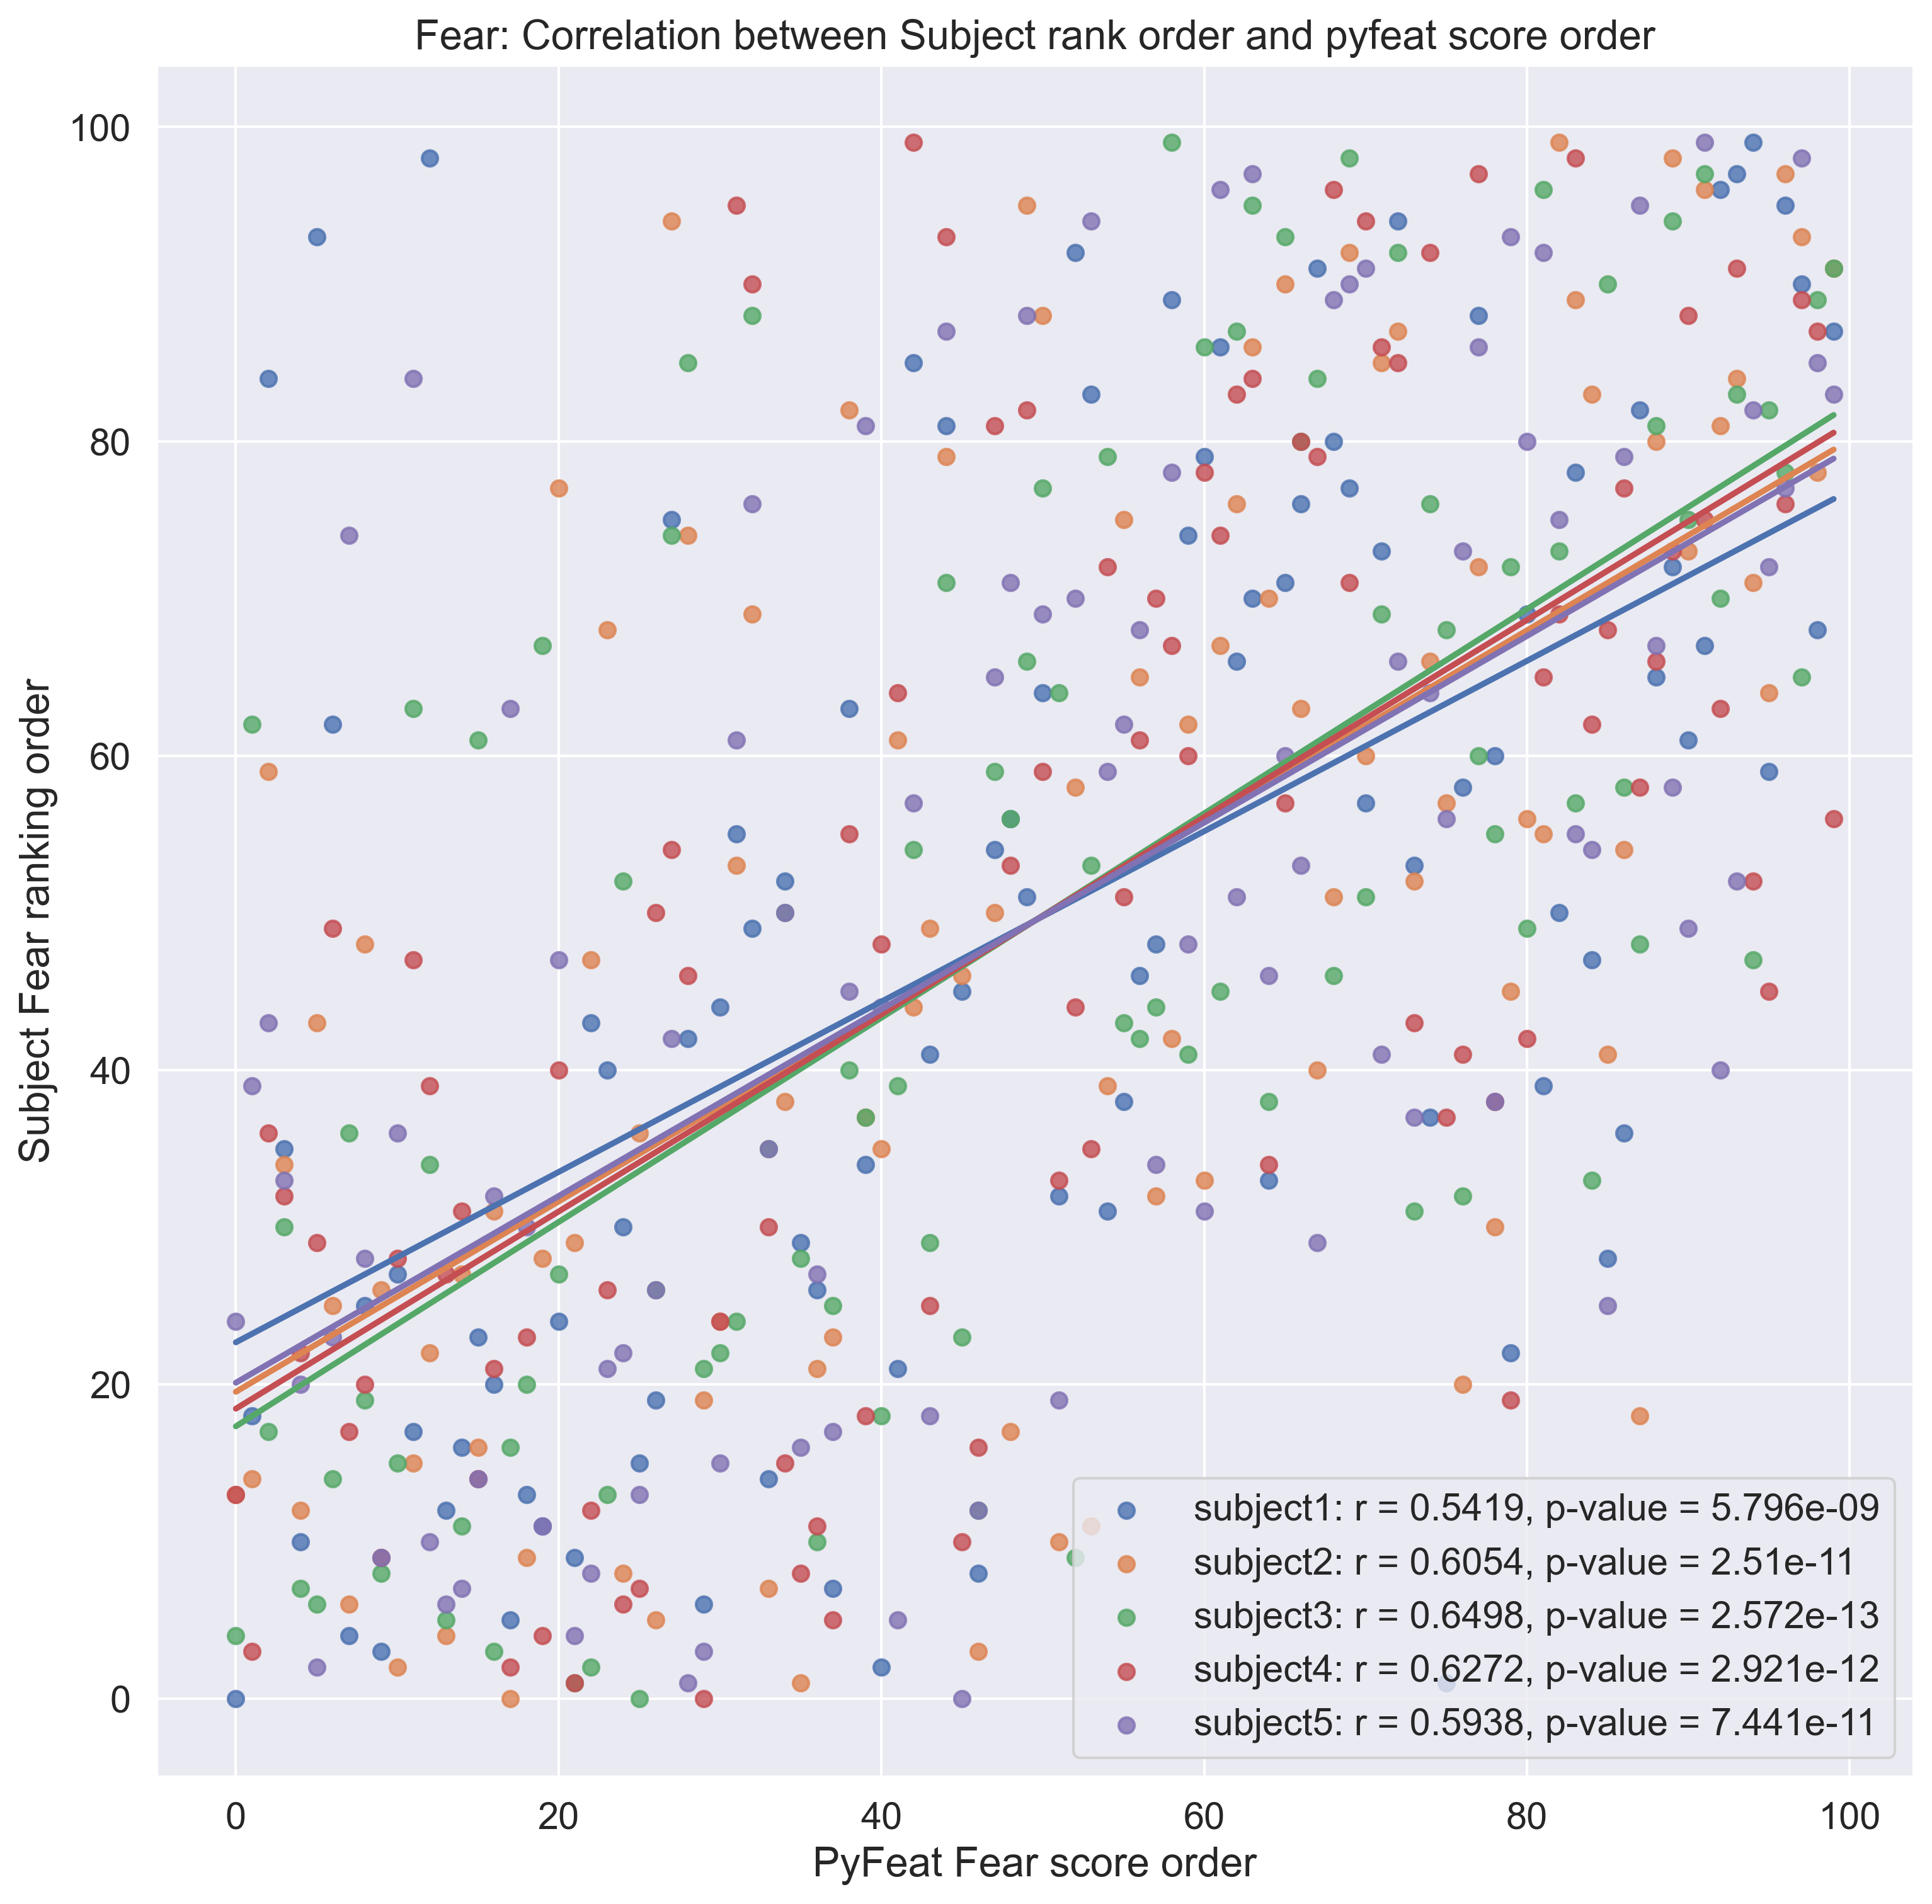

In [221]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy.stats as stats
# print(total_data.head())

sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
# plt.xlim(-0.05, 1.05)
# plt.ylim(1.8, 7.2)
f.set_facecolor('white') # set background color
myexp = 'Fear'
ax.set_title('{}: Correlation between Subject rank order and pyfeat score order'.format(myexp)) # title
ax.set_xlabel('PyFeat {} score order'.format(myexp)) # x-axis
ax.set_ylabel('Subject {} ranking order'.format(myexp)) # y-axis

values = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    # print(j_data)
    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_data):
        temp_list.append((c, fear_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])
    # temp_list = [x[0] for x in temp_list]
    
    x = [k[1] for k in temp_list]
    y = [m[0][0] for m in temp_list]
    
   
    X, y = np.array(x), np.array(y)
    # print(X, y)
    X = X[:, None] # Reshape to 2D as requested
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict response
    predictions = reg.predict(X)
    
    # pearsonr
    #     my_corrcoef = stats.pearsonr(fig_data[0], y)
    #     print('my_corrcoef', my_corrcoef)

    #     my_rho = np.corrcoef(fig_data[0], y)
    #     print('my_rho', my_rho)
    
    # Use stats linregress library
    reg2 = stats.linregress(x, y)
    print(reg2)
    # subject_name
    s_name = 'subject' + str(i + 1) + ':'
    # r is The Pearson correlation coefficient
    sns.regplot(x, y, ci=None, label=s_name + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
    plt.legend()
    # break
# plt.savefig('{}_linear_regression_fitting.png'.format(myexp), bbox_inches='tight', dpi=300)

In [171]:
from scipy.stats import spearmanr

# sns.set(font_scale = 1.3)
# f, ax = plt.subplots(figsize=(6, 6), dpi=300)
# ax.set_title('Participant ranking in pyfeat score order') # title
# ax.set_xlabel('PyFeat ranking') # x-axis
# ax.set_ylabel('Participant ranking result') # y-axis

res_spearmanr = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    # print(j_data)
    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_data):
        temp_list.append((c, fear_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])

    
    x = [k[1] for k in temp_list]
    y = [m[0][0] for m in temp_list]
    
    #calculate Spearman Rank correlation and corresponding p-value
    rho, p = spearmanr(x, y)
    res_spearmanr.append([i, rho, p])
    #print Spearman rank correlation and p-value
    print('subject', i)
    print(rho)
    print(p)
    print()
    # scatter plot
    # sns.scatterplot(x, y)
    
    # line chart
print('Same as the ')

subject 0
0.5419021902190219
5.79618378573314e-09

subject 1
0.6054365436543654
2.5103193898572326e-11

subject 2
0.6498409840984098
2.572290991437342e-13

subject 3
0.6271707170717071
2.9213551455318462e-12

subject 4
0.5937953795379537
7.44100454545145e-11



# Spearman's correlation 


$${\displaystyle r_{s}=1-{\frac {6\sum d_{i}^{2}}{n(n^{2}-1)}},}$$

In [214]:
print(y)

[576, 2020, 3701, 4601, 4857, 4866, 5155, 9644, 10044, 10044, 10720, 16049, 16053, 16102, 16151, 16152, 16408, 18524, 18668, 18732, 19461, 19750, 19946, 19950, 19954, 20098, 20098, 20323, 21052, 21728, 21953, 22853, 24789, 24793, 25049, 25410, 25491, 25891, 25940, 27704, 27720, 29016, 29241, 29866, 31715, 33740, 34896, 35220, 35749, 37270, 37631, 38655, 38979, 40660, 40685, 40734, 40878, 41407, 41807, 41928, 42769, 43994, 44115, 45271, 45595, 45620, 45789, 47233, 47674, 48115, 48556, 49456, 49492, 50788, 50888, 51249, 51258, 51339, 52939, 53135, 53135, 53256, 53305, 54089, 54989, 58589, 58638, 58702, 59143, 60104, 61785, 61849, 64553, 66234, 66378, 66907, 67268, 67269, 67438, 67694]


76342
65754
58354
62132
67694


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

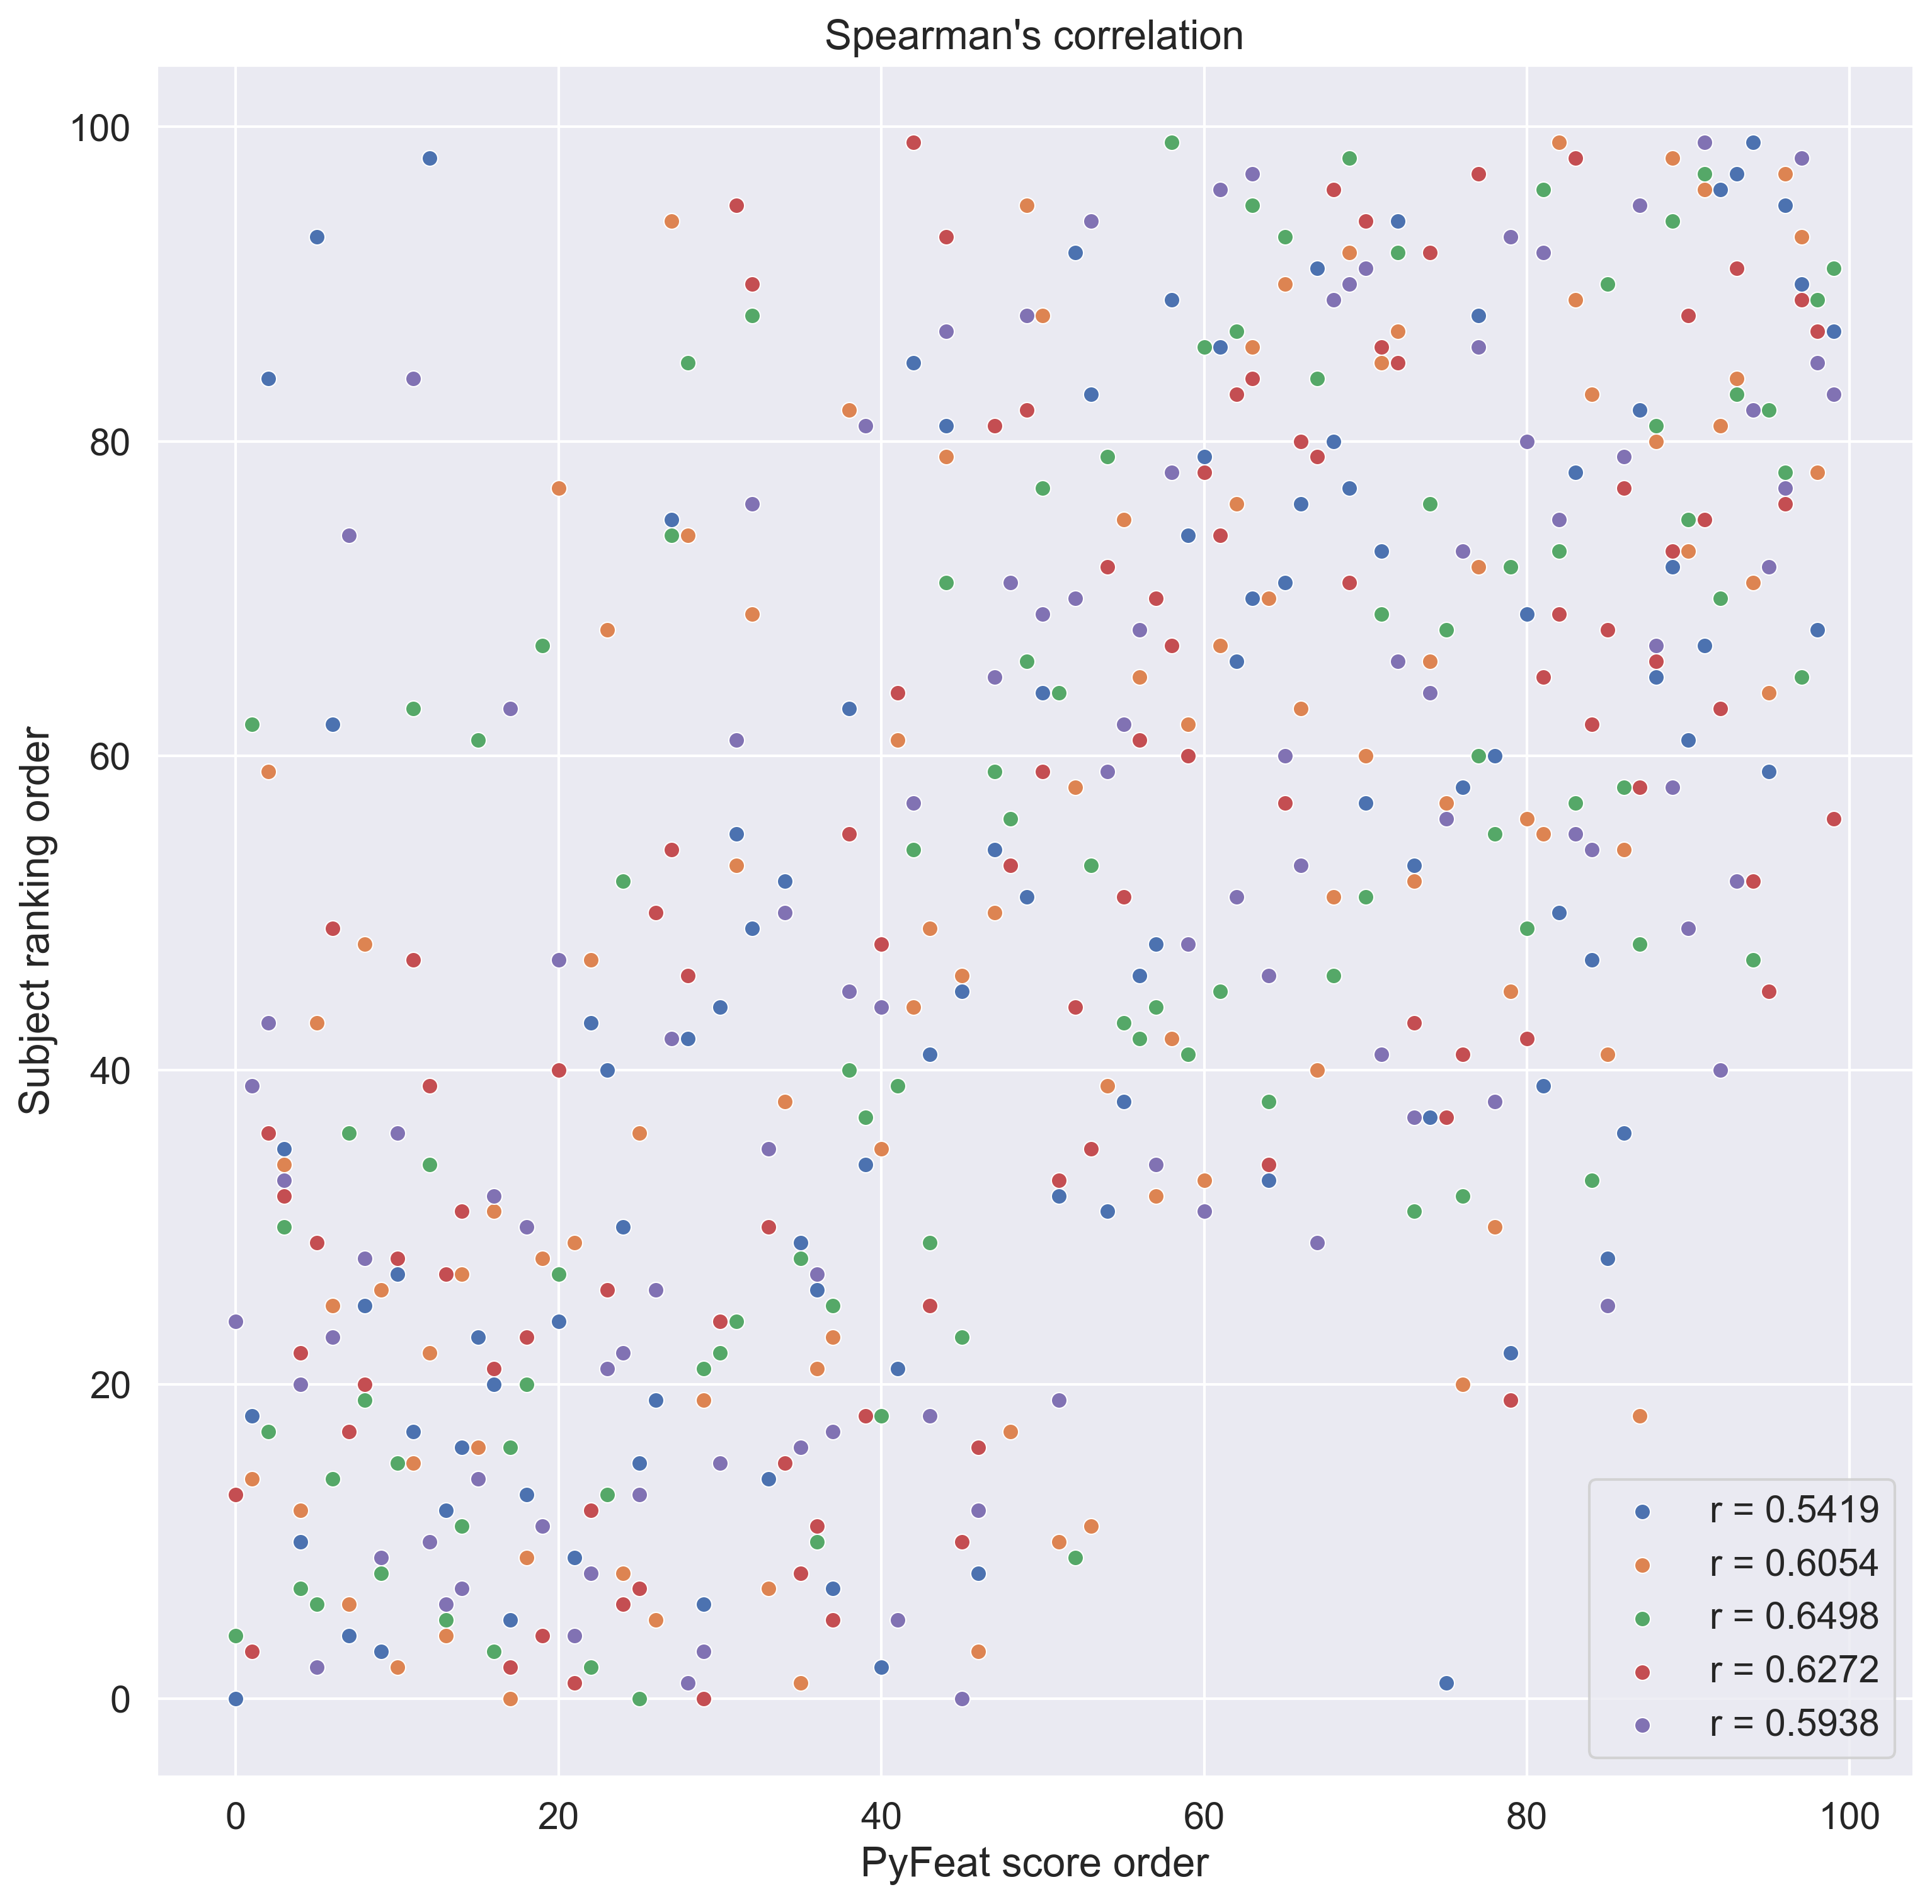

In [223]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy.stats as stats
# print(total_data.head())


sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
# plt.xlim(-0.05, 1.05)
# plt.ylim(1.8, 7.2)
f.set_facecolor('white') # set background color
ax.set_title("Spearman's correlation") # title
ax.set_xlabel('PyFeat score order') # x-axis
ax.set_ylabel('Subject ranking order') # y-axis

values = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    # print(j_data)
    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_data):
        temp_list.append((c, fear_name_rank_order_pyfeat[c[1]]))
    temp_list.sort(key=lambda x:x[1])
    # temp_list = [x[0] for x in temp_list]
    
    x = [k[1] for k in temp_list]
    y = []
    temp_score = 0
    for k in temp_list:
        tmp = abs(k[1] - k[0][0]) ** 2
        temp_score += tmp
        y.append(temp_score)
    
    pier = y[-1]
    print(pier)
    
    y = [m[0][0] for m in temp_list]
    n = 100
    rval = 1 - 6 * pier / (n * (n ** 2 - 1))
    # print(rval)
    sns.scatterplot(x, y, label = 'r = {:.4}'.format(rval) )

    
    # subject_name
    s_name = 'subject' + str(i + 1) + ':'
    # r is The Pearson correlation coefficient
    plt.legend()
    # break
# plt.savefig('Spearman's correlation.png', bbox_inches='tight', dpi=300)



# Divide to two parts and compute

## upper half

LinregressResult(slope=0.2522448979591837, intercept=18.32, rvalue=0.2522448979591837, pvalue=0.07719012781215702, stderr=0.13967018527689623, intercept_stderr=3.9714008221024377)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=0.32312124849939977, intercept=16.583529411764705, rvalue=0.32312124849939977, pvalue=0.022091017642268448, stderr=0.13659495009334693, intercept_stderr=3.8839591715318904)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=0.36912364945978393, intercept=15.456470588235293, rvalue=0.36912364945978393, pvalue=0.00834070697434153, stderr=0.1341444907715721, intercept_stderr=3.8142824817950505)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=0.27116446578631453, intercept=17.856470588235293, rvalue=0.27116446578631453, pvalue=0.05680825545039388, stderr=0.1389296758926693, intercept_stderr=3.950345078734853)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=0.17906362545018006, intercept=20.11294117647059, rvalue=0.17906362545018006, pvalue=0.21341445329928826, stderr=0.14200471075230786, intercept_stderr=4.037781033268396)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


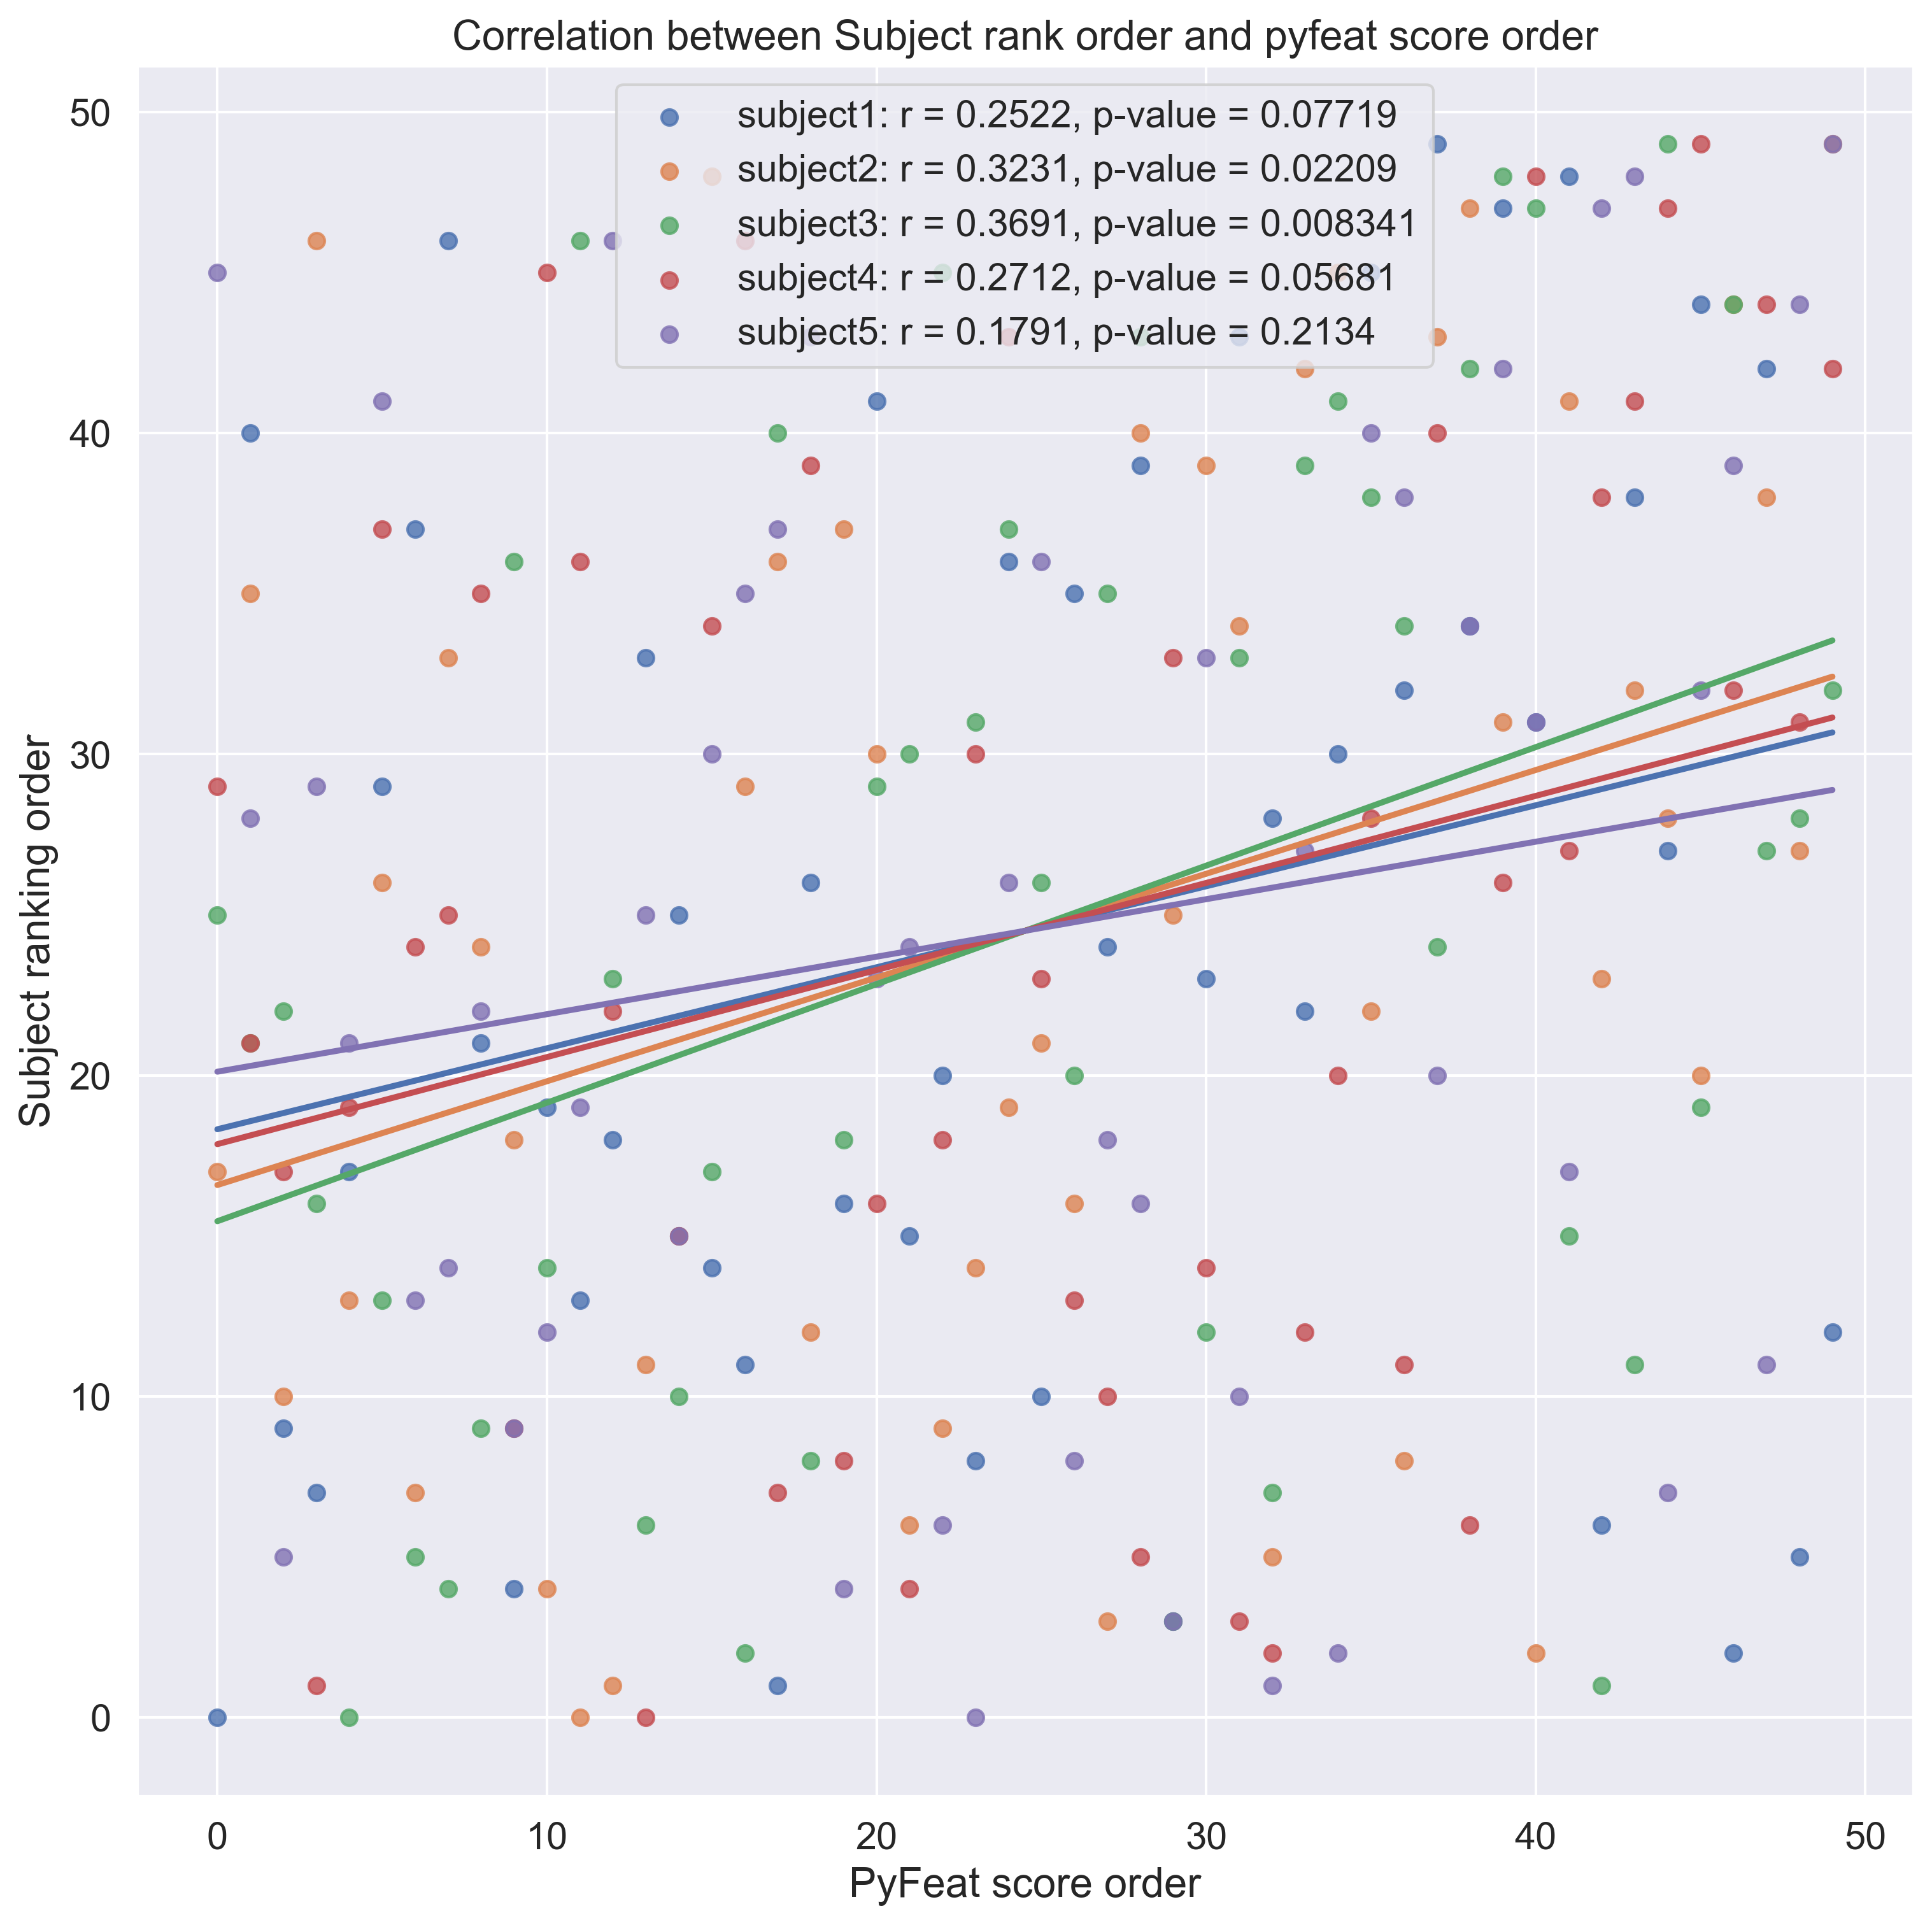

In [200]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy.stats as stats
# print(total_data.head())

sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
# plt.xlim(-0.05, 1.05)
# plt.ylim(1.8, 7.2)
f.set_facecolor('white') # set background color
ax.set_title('Correlation between Subject rank order and pyfeat score order') # title
ax.set_xlabel('PyFeat score order') # x-axis
ax.set_ylabel('Subject ranking order') # y-axis

values = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    temp_gt = list(fear_name_rank_order_pyfeat.items())[:50]
    tmp_dic = {x[1]:x[0] for x in temp_data}

    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_gt):
        temp_list.append((c, tmp_dic[c[0]]))
    temp_list.sort(key=lambda x:x[1])
    temp_list = [x[0] for x in temp_list]
    temp_list = list(enumerate(temp_list))

    x = [k[0] for k in temp_list]
    y = [m[1][1] for m in temp_list]
   
    X, y = np.array(x), np.array(y)
    # print(X, y)
    X = X[:, None] # Reshape to 2D as requested
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict response
    predictions = reg.predict(X)
    
    # Use stats linregress library
    reg2 = stats.linregress(x, y)
    print(reg2)
    # subject_name
    s_name = 'subject' + str(i + 1) + ':'
    # r is The Pearson correlation coefficient
    sns.regplot(x, y, ci=None, label=s_name + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
    plt.legend()
    
    plt.savefig('test' + str(i) + '.png', bbox_inches='tight', dpi=300)
    # break
# plt.savefig('linear_regression_fitting.png', bbox_inches='tight', dpi=300)

## lower half

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] [25, 29, 35, 4, 1, 14, 36, 24, 5, 31, 6, 34, 7, 32, 23, 20, 26, 45, 28, 40, 0, 38, 12, 41, 48, 30, 13, 15, 39, 21, 9, 16, 19, 33, 10, 18, 37, 3, 11, 49, 27, 8, 47, 17, 2, 22, 46, 42, 43, 44]
LinregressResult(slope=0.1856902761104442, intercept=19.950588235294116, rvalue=0.1856902761104442, pvalue=0.1966757713784721, stderr=0.14182729531003155, intercept_stderr=4.032736378735197)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] [1, 3, 37, 26, 28, 7, 10, 4, 17, 35, 8, 29, 18, 23, 36, 31, 30, 25, 2, 20, 9, 16, 45, 6, 24, 11, 14, 44, 27, 40, 5, 12, 48, 38, 42, 34, 43, 21, 13, 22, 0, 33, 15, 49, 19, 47, 41, 46, 39, 32]
LinregressResult(slope=0.39678271308523405, intercept=14.778823529411765, rvalue=0.39678271308523405, pvalue=0.0043329844252208765, stderr=0.13248926675054984, intercept_stderr=3.767217619492338)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] [2, 23, 26, 34, 14, 9, 6, 5, 7, 11, 18, 44, 37, 30, 20, 3, 28, 33, 36, 27, 1, 47, 25, 21, 42, 29, 32, 40, 24, 0, 46, 4, 16, 38, 45, 43, 17, 10, 12, 48, 35, 49, 22, 15, 39, 13, 31, 41, 19, 8]
LinregressResult(slope=0.22977190876350542, intercept=18.870588235294118, rvalue=0.22977190876350542, pvalue=0.10845033220088968, stderr=0.14047574449164815, intercept_stderr=3.9943062010949233)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] [29, 1, 14, 3, 25, 28, 26, 30, 23, 2, 45, 5, 44, 49, 15, 37, 0, 9, 6, 34, 42, 31, 38, 8, 35, 32, 7, 19, 4, 39, 11, 41, 46, 36, 10, 17, 16, 12, 13, 22, 21, 48, 40, 47, 43, 24, 20, 18, 27, 33]
LinregressResult(slope=0.19135654261704682, intercept=19.811764705882354, rvalue=0.19135654261704682, pvalue=0.1831195380437131, stderr=0.14167029458082495, intercept_stderr=4.028272198897491)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] [1, 35, 17, 10, 7, 23, 28, 42, 21, 14, 9, 40, 12, 43, 16, 34, 33, 25, 39, 4, 15, 5, 24, 22, 38, 6, 0, 2, 45, 26, 32, 46, 8, 36, 30, 44, 49, 48, 27, 18, 19, 20, 31, 29, 3, 37, 11, 13, 47, 41]
LinregressResult(slope=0.21306122448979592, intercept=19.28, rvalue=0.21306122448979592, pvalue=0.13738969749809182, stderr=0.14102341077953665, intercept_stderr=4.009878617939981)


/usr/local/Caskroom/miniconda/base/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


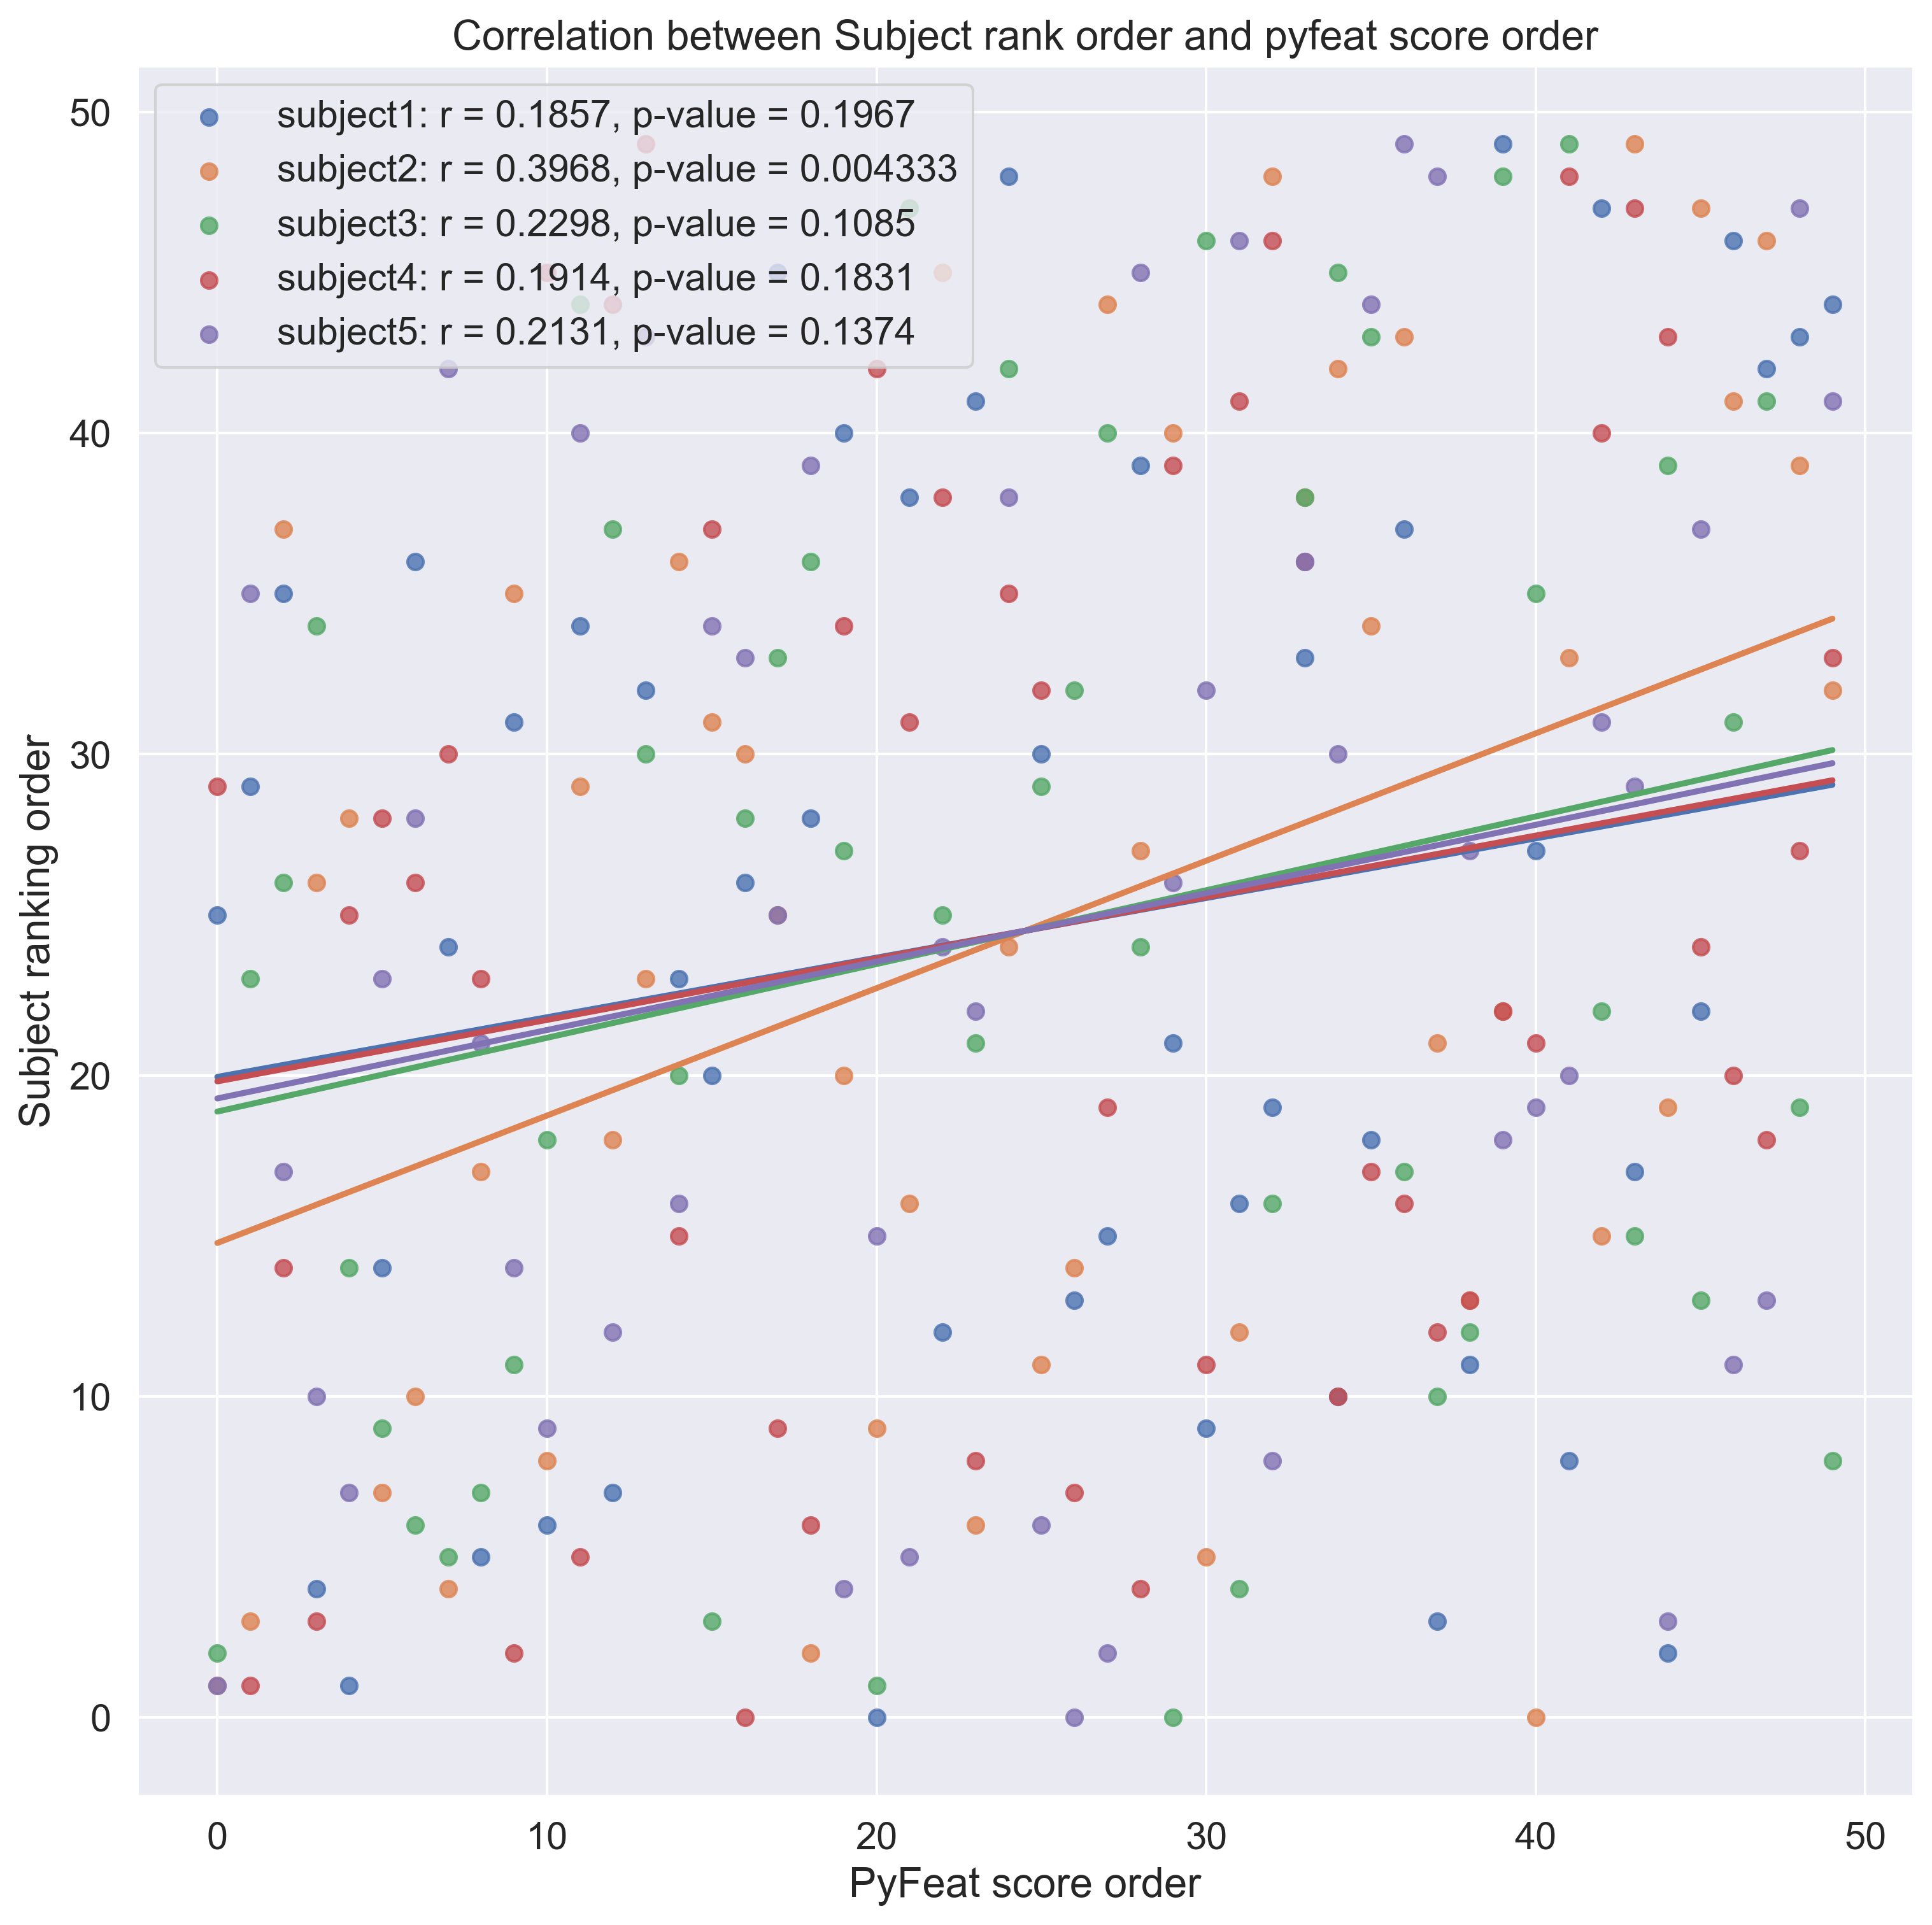

In [205]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy.stats as stats
# print(total_data.head())

sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
# plt.xlim(-0.05, 1.05)
# plt.ylim(1.8, 7.2)
f.set_facecolor('white') # set background color
ax.set_title('Correlation between Subject rank order and pyfeat score order') # title
ax.set_xlabel('PyFeat score order') # x-axis
ax.set_ylabel('Subject ranking order') # y-axis

values = []
for i in range(len(cleaned_result)):
    temp_data = list(enumerate(cleaned_result[i][1]))
    temp_gt = list(fear_name_rank_order_pyfeat.items())[50:]
    tmp_dic = {x[1]:x[0] for x in temp_data}

    # compute rank 
    temp_list = []
    for j, c in enumerate(temp_gt):
        temp_list.append(((c[0], c[1]-50), tmp_dic[c[0]]))
    temp_list.sort(key=lambda x:x[1])
    temp_list = [x[0] for x in temp_list]
    temp_list = list(enumerate(temp_list))

    x = [k[0] for k in temp_list]
    y = [m[1][1] for m in temp_list]
    print(x, y)
    X, y = np.array(x), np.array(y)
    # print(X, y)
    X = X[:, None] # Reshape to 2D as requested
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict response
    predictions = reg.predict(X)
    
    # Use stats linregress library
    reg2 = stats.linregress(x, y)
    print(reg2)
    # subject_name
    s_name = 'subject' + str(i + 1) + ':'
    # r is The Pearson correlation coefficient
    sns.regplot(x, y, ci=None, label=s_name + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
    plt.legend()
    
    plt.savefig('test' + str(i) + '.png', bbox_inches='tight', dpi=300)
    # break
# plt.savefig('linear_regression_fitting.png', bbox_inches='tight', dpi=300)